In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import ast

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
df_customer = pd.read_csv('../../Final Project/Starbucks data/profile.csv')
df_customer

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...,...
16995,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [3]:
df_offer = pd.read_csv('../../Final Project/Starbucks data/portfolio.csv')
df_offer

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [4]:
df_transcript = pd.read_csv('../../Final Project/Starbucks data/transcript.csv')
df_transcript

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


## **--Data Cleaning--**

### Imputation

#### Customer

In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


In [6]:
df_customer.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df_customer.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [8]:
# Mengecek apakah value pada kolom gender yang kosong sama dengan value yang kosong pada kolom income
na_gender = df_customer[df_customer['gender'].isna()]
na_income = df_customer[df_customer['income'].isna()]

np.sum(na_gender['id'] == na_income['id'])

2175

In [9]:
df_customer = df_customer.loc[df_customer['gender'] != 'O']

In [10]:
df_customer = df_customer.dropna().reset_index(drop=True)

In [11]:
df_customer

,gender,age,id,became_member_on,income
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
2,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
3,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
14608,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
14609,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
14610,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
14611,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [12]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14613 entries, 0 to 14612
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14613 non-null  object 
 1   age               14613 non-null  int64  
 2   id                14613 non-null  object 
 3   became_member_on  14613 non-null  int64  
 4   income            14613 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 570.9+ KB


#### Offer

In [13]:
df_offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 692.0+ bytes


In [14]:
df_offer.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
df_offer

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


#### Transcript

In [16]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


In [17]:
df_transcript.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
df_transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


### Check Data Type

#### Customer

In [19]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14613 entries, 0 to 14612
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14613 non-null  object 
 1   age               14613 non-null  int64  
 2   id                14613 non-null  object 
 3   became_member_on  14613 non-null  int64  
 4   income            14613 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 570.9+ KB


In [20]:
df_customer['became_member_on'] = pd.to_datetime(df_customer['became_member_on'], format='%Y%m%d')
df_customer

,gender,age,id,became_member_on,income
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
2,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
3,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0
...,...,...,...,...,...
14608,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
14609,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
14610,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
14611,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


In [21]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14613 entries, 0 to 14612
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14613 non-null  object        
 1   age               14613 non-null  int64         
 2   id                14613 non-null  object        
 3   became_member_on  14613 non-null  datetime64[ns]
 4   income            14613 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 570.9+ KB


#### Offer

In [22]:
df_offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


#### Transcript

In [23]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


## **--Outliers**

In [24]:
lof = LocalOutlierFactor(contamination=0.1)  # Adjust contamination parameter as needed
outlier_scores = lof.fit_predict(df_customer[['age']])

# Menandai outlier
outliers = df_customer.loc[outlier_scores == -1]

# Menampilkan hasil
print("Outliers:")
outliers

Outliers:


,gender,age,id,became_member_on,income
21,F,96,868317b9be554cb18e50bc68484749a2,2017-11-17,89000.0
242,F,100,24c1287eb7a84cfd80472a82e05b1d57,2015-08-28,63000.0
827,F,96,f5112242df984403bfb4176d4487aef3,2017-11-28,72000.0
994,F,100,28bbebb2b76f4057b1115dd80441e37a,2017-09-05,118000.0
1039,M,96,593c3cd7ab1e4a10a6f9279544da7df3,2016-04-12,82000.0
1324,F,101,4d2ccfcbbebf4bd9baf4b7e433d0e288,2017-10-04,43000.0
1371,F,100,857fc6e18cf74f7b8ebce26bbfbd3028,2018-01-23,109000.0
3513,F,101,d2fdc2be8ab64e4ba04830d441e53fd5,2015-05-26,99000.0
3669,M,100,b12e8e0f14ae4ad0b576f7c016e7e89b,2015-09-11,98000.0
5219,F,100,9b675a966bd040eeac75f9aa01b14773,2018-04-10,70000.0


In [25]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 21 to 14496
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            24 non-null     object        
 1   age               24 non-null     int64         
 2   id                24 non-null     object        
 3   became_member_on  24 non-null     datetime64[ns]
 4   income            24 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [26]:
df_customer = df_customer.loc[outlier_scores != -1]
df_customer

,gender,age,id,became_member_on,income
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
2,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
3,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0
...,...,...,...,...,...
14608,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
14609,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
14610,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
14611,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


In [27]:
df_customer.describe()

,age,became_member_on,income
count,14589.000000,14589,14589.000000
mean,54.320241,2017-02-17 20:55:01.665638400,65417.095072
min,18.000000,2013-07-29 00:00:00,30000.000000
25%,42.000000,2016-05-19 00:00:00,49000.000000
50%,55.000000,2017-08-02 00:00:00,64000.000000
75%,66.000000,2017-12-30 00:00:00,80000.000000
max,99.000000,2018-07-26 00:00:00,120000.000000
std,17.320437,NaN,21630.327247


In [28]:
df_transcript = df_transcript.loc[~df_transcript['person'].isin(outliers['id'])]
df_transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


## **--Data Transformation**

In [29]:
df_customer.loc[:, 'gender'] = df_customer['gender'].replace({'F': 'Female', 'M': 'Male', 'O':'Other'})
df_customer.head(2)

,gender,age,id,became_member_on,income
0,Female,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
1,Female,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0


In [30]:
offers = df_offer.copy()
customers = df_customer.copy()
transcripts = df_transcript.copy()

In [31]:
customers['age_group'] = customers['age'].apply(lambda x:'Usia Muda' if x>=18 and x<=24 else
                                                            ('Usia Produktif' if x>=25 and x<=64 else
                                                            ('Usia Lanjut')))

customers

,gender,age,id,became_member_on,income,age_group
0,Female,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,Usia Produktif
1,Female,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,Usia Lanjut
2,Male,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,Usia Lanjut
3,Male,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,Usia Lanjut
4,Male,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,Usia Produktif
...,...,...,...,...,...,...
14608,Female,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,Usia Produktif
14609,Male,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,Usia Produktif
14610,Male,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,Usia Produktif
14611,Female,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,Usia Lanjut


In [32]:
customers['income_group'] = customers['income'].apply(lambda x:'Low Income' if x<=40000.0 else
                                                            ('Middle Income' if x>=41000.0 and x<=80000.0 else
                                                            ('High Income')))

customers

,gender,age,id,became_member_on,income,age_group,income_group
0,Female,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,Usia Produktif,High Income
1,Female,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,Usia Lanjut,High Income
2,Male,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,Usia Lanjut,Middle Income
3,Male,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,Usia Lanjut,Middle Income
4,Male,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,Usia Produktif,Middle Income
...,...,...,...,...,...,...,...
14608,Female,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,Usia Produktif,Middle Income
14609,Male,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,Usia Produktif,Middle Income
14610,Male,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,Usia Produktif,Middle Income
14611,Female,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,Usia Lanjut,Middle Income


In [33]:
#menghilangkan tanda ' ' pada data dictionary
offers['channels'] = offers['channels'].apply(lambda x:ast.literal_eval(x))

label_ch = offers['channels']

#Mentransformasikan data dict tersebut menjadi kolom dengan value isi Biner
mlb = MultiLabelBinarizer()
label_ch = mlb.fit_transform(offers['channels'])

channel_dummies = pd.DataFrame(label_ch, columns=mlb.classes_)
channel_dummies

,email,mobile,social,web
0,1,1,1,0
1,1,1,1,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,0
8,1,1,1,1
9,1,1,0,1


In [34]:
#Menggabungkan dataframe offer, dan channel serta offer type yang sudah di transformasikan
offer_type_dummies = offers['offer_type'].str.get_dummies()
offers = pd.concat([offers,channel_dummies, offer_type_dummies], axis=1)
offers

,reward,channels,difficulty,duration,offer_type,id,email,mobile,social,web,bogo,discount,informational
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,0,1
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,0,1,0
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,0,0,1
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,0,1,0


In [35]:
#Mentransformasikan event menjadi kolom dengan isi value Biner
event_dummies = transcripts['event'].str.get_dummies()
transcripts = pd.concat([transcripts, event_dummies], axis=1)
transcripts.rename(columns={'offer received': 'offer_received', 'offer viewed': 'offer_viewed', 'offer completed': 'offer_completed'}, inplace=True)

transcripts

,person,event,value,time,offer_completed,offer_received,offer_viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,0,1,0,0
...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,0,0,0,1
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,0,0,0,1
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,0,0,0,1
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,0,0,0,1


In [36]:
#Split data transcripts
transactions = transcripts.query('event == "transaction"').copy()
offer = transcripts.query('event != "transaction"').copy()

In [37]:
transcripts

,person,event,value,time,offer_completed,offer_received,offer_viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,0,1,0,0
...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,0,0,0,1
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,0,0,0,1
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,0,0,0,1
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,0,0,0,1


In [38]:
ast.literal_eval(transcripts['value'].iloc[0])
transcripts['value'] = transcripts['value'].apply(lambda x: ast.literal_eval(x))

transcripts['dict_value'] = transcripts['value'].apply(lambda x: list(x.values())[0])
transcripts.drop('value', axis=1, inplace=True)

transcripts

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,dict_value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,0,1,0,0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,0,0,0,1,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,0,0,0,1,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,0,0,0,1,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,0,0,0,1,3.53


In [39]:
transcripts['offer_id'] = transcripts['dict_value']
transcripts['amount'] = transcripts['dict_value']

# Mengatur nilai kolom 'offer_id' dan 'amount' sesuai dengan event
transcripts.loc[transcripts['event'] != 'transaction', 'amount'] = None
transcripts.loc[transcripts['event'] == 'transaction', 'offer_id'] = None

transcripts.drop('dict_value', axis=1, inplace=True)

In [40]:
transcripts

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,None
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,None
2,e2127556f4f64592b11af22de27a7932,offer received,0,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,None
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4,None
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,None
...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,0,0,0,1,None,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,0,0,0,1,None,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,0,0,0,1,None,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,0,0,0,1,None,3.53


In [41]:
transcripts.fillna(0, inplace=True)

In [42]:
transcripts

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.00
2,e2127556f4f64592b11af22de27a7932,offer received,0,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,0.00
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4,0.00
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00
...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,0,0,0,1,0,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,0,0,0,1,0,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,0,0,0,1,0,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,0,0,0,1,0,3.53


In [43]:
customers

,gender,age,id,became_member_on,income,age_group,income_group
0,Female,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,Usia Produktif,High Income
1,Female,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,Usia Lanjut,High Income
2,Male,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,Usia Lanjut,Middle Income
3,Male,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,Usia Lanjut,Middle Income
4,Male,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,Usia Produktif,Middle Income
...,...,...,...,...,...,...,...
14608,Female,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,Usia Produktif,Middle Income
14609,Male,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,Usia Produktif,Middle Income
14610,Male,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,Usia Produktif,Middle Income
14611,Female,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,Usia Lanjut,Middle Income


In [44]:
offers

,reward,channels,difficulty,duration,offer_type,id,email,mobile,social,web,bogo,discount,informational
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,0,1
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,0,1,0
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,0,0,1
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,0,1,0


In [45]:
transcripts[transcripts['event']=='transaction']

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0,0,0,0,1,0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,0,0,0,1,0,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,0,0,0,0,1,0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,0,0,0,1,0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,0,0,0,1,0,18.97
...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,0,0,0,1,0,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,0,0,0,1,0,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,0,0,0,1,0,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,0,0,0,1,0,3.53


In [46]:
transcripts[transcripts['event']!='transaction']

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0
2,e2127556f4f64592b11af22de27a7932,offer received,0,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4,0.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0
...,...,...,...,...,...,...,...,...,...
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,714,1,0,0,0,2298d6c36e964ae4a3e7e9706d1fb8c2,0.0
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,714,1,0,0,0,fafdcd668e3743c1bb461111dcafc2a4,0.0
306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,714,0,0,1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,714,1,0,0,0,fafdcd668e3743c1bb461111dcafc2a4,0.0


## **-- Merge Data**

In [47]:
transcripts.head(2)

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0


In [48]:
customers.head(2)

,gender,age,id,became_member_on,income,age_group,income_group
0,Female,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,Usia Produktif,High Income
1,Female,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,Usia Lanjut,High Income


In [49]:
offers.head(2)

,reward,channels,difficulty,duration,offer_type,id,email,mobile,social,web,bogo,discount,informational
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0


In [50]:
without_member = transcripts.loc[~transcripts['person'].isin(customers['id'])]
without_member

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.00
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4,0.00
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00
6,c4863c7985cf408faee930f111475da3,offer received,0,0,1,0,0,2298d6c36e964ae4a3e7e9706d1fb8c2,0.00
10,744d603ef08c4f33af5a61c8c7628d1c,offer received,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.00
...,...,...,...,...,...,...,...,...,...
306503,a97208c5be42445d9949e82e0f70f622,transaction,714,0,0,0,1,0,5.80
306505,b895c57e8cd047a8872ce02aa54759d6,transaction,714,0,0,0,1,0,4.48
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,714,1,0,0,0,fafdcd668e3743c1bb461111dcafc2a4,0.00
306528,5ca2620962114246ab218fc648eb3934,transaction,714,0,0,0,1,0,2.20


In [51]:
without_member[without_member['event']=='transaction']

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount
12686,bbeb54e861614fc7b22a8844f72dca6c,transaction,0,0,0,0,1,0,0.22
12738,7ca349e55ff544c7a13addfdea2e2c06,transaction,0,0,0,0,1,0,1.02
12777,ed46fca6de7042478b411690878dc069,transaction,0,0,0,0,1,0,1.16
12849,098d124614df4e4b862d678160b98638,transaction,0,0,0,0,1,0,1.21
12854,62bacb593a434f0d96b814075418e983,transaction,0,0,0,0,1,0,2.95
...,...,...,...,...,...,...,...,...,...
306496,a6f84f4e976f44508c358cc9aba6d2b3,transaction,714,0,0,0,1,0,6.49
306503,a97208c5be42445d9949e82e0f70f622,transaction,714,0,0,0,1,0,5.80
306505,b895c57e8cd047a8872ce02aa54759d6,transaction,714,0,0,0,1,0,4.48
306528,5ca2620962114246ab218fc648eb3934,transaction,714,0,0,0,1,0,2.20


In [52]:
offer = transcripts.merge(customers, left_on='person', right_on='id')
offer

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,gender,age,id,became_member_on,income,age_group,income_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,Female,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,Usia Lanjut,High Income
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,Female,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,Usia Lanjut,High Income
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,0,0,0,1,0,19.89,Female,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,Usia Lanjut,High Income
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,Female,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,Usia Lanjut,High Income
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,0,0,0,1,0,17.78,Female,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,Usia Lanjut,High Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268338,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,504,0,0,1,0,3f207df678b143eea3cee63160fa8bed,0.00,Male,47,9fcbff4f8d7241faa4ab8a9d19c8a812,2017-10-13,94000.0,Usia Produktif,High Income
268339,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,576,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,Male,47,9fcbff4f8d7241faa4ab8a9d19c8a812,2017-10-13,94000.0,Usia Produktif,High Income
268340,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,576,0,0,1,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,Male,47,9fcbff4f8d7241faa4ab8a9d19c8a812,2017-10-13,94000.0,Usia Produktif,High Income
268341,3045af4e98794a04a5542d3eac939b1f,offer received,576,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,Female,58,3045af4e98794a04a5542d3eac939b1f,2016-10-20,78000.0,Usia Produktif,Middle Income


In [53]:
offer = offer.merge(offers, left_on='offer_id', right_on='id', how='left')
offer.drop(['id_x', 'id_y'], axis=1, inplace=True)
offer

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,gender,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,0,0,0,1,0,19.89,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,0,0,0,1,0,17.78,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268338,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,504,0,0,1,0,3f207df678b143eea3cee63160fa8bed,0.00,Male,...,0.0,4.0,informational,1.0,1.0,0.0,1.0,0.0,0.0,1.0
268339,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,576,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,Male,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
268340,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,576,0,0,1,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,Male,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
268341,3045af4e98794a04a5542d3eac939b1f,offer received,576,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,Female,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [54]:
offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268343 entries, 0 to 268342
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   person            268343 non-null  object        
 1   event             268343 non-null  object        
 2   time              268343 non-null  int64         
 3   offer_completed   268343 non-null  int64         
 4   offer_received    268343 non-null  int64         
 5   offer_viewed      268343 non-null  int64         
 6   transaction       268343 non-null  int64         
 7   offer_id          268343 non-null  object        
 8   amount            268343 non-null  float64       
 9   gender            268343 non-null  object        
 10  age               268343 non-null  int64         
 11  became_member_on  268343 non-null  datetime64[ns]
 12  income            268343 non-null  float64       
 13  age_group         268343 non-null  object        
 14  inco

In [55]:
offer.fillna(0, inplace=True)

In [56]:
offer

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,gender,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,0,0,0,1,0,19.89,Female,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,0,0,0,1,0,17.78,Female,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268338,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,504,0,0,1,0,3f207df678b143eea3cee63160fa8bed,0.00,Male,...,0.0,4.0,informational,1.0,1.0,0.0,1.0,0.0,0.0,1.0
268339,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,576,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,Male,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
268340,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,576,0,0,1,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,Male,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
268341,3045af4e98794a04a5542d3eac939b1f,offer received,576,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,Female,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [57]:
customer_offers = offer.groupby(['person', 'event']).agg(
    total_reward = ('reward', 'sum'),
    difficulty_avg = ('difficulty', 'mean'),
    num_of_email = ('email', 'sum'),
    num_of_mobile = ('mobile', 'sum'),
    num_of_social = ('social', 'sum'),
    num_of_web = ('web', 'sum'),
    num_of_bogo = ('bogo', 'sum'),
    num_of_discount = ('discount', 'sum'),
    num_of_informational = ('informational', 'sum'),
    num_of_offer_received = ('offer_received', 'sum'),
    num_of_offer_viewed = ('offer_viewed', 'sum'),
    num_of_offer_completed = ('offer_completed', 'sum'),
    num_of_transaction = ('transaction', 'sum'),
    money_of_spent = ('amount', 'sum')
)
customer_offers

total_reward  \
person                           event                           
0009655768c64bdeb2e877511632db8f offer completed           9.0   
                                 offer received            9.0   
                                 offer viewed              7.0   
                                 transaction               0.0   
0020c2b971eb4e9188eac86d93036a77 offer completed          14.0   
...                                                        ...   
fffad4f4828548d1b5583907f2e9906b transaction               0.0   
ffff82501cea40309d5fdd7edcca4a07 offer completed          18.0   
                                 offer received           18.0   
                                 offer viewed             18.0   
                                 transaction               0.0   

                                                  difficulty_avg  \
person                           event                             
0009655768c64bdeb2e877511632db8f offer completed        8.333333   
                                 offer received         5.000000   
                                 offer viewed           3.750000   
                                 transaction            0.000000   
0020c2b971eb4e9188eac86d93036a77 offer completed       10.000000   
...                                                          ...   
fffad4f4828548d1b5583907f2e9906b transaction            0.000000   
ffff82501cea40309d5fdd7edcca4a07 offer completed       10.833333   
                                 offer received        10.833333   
                                 offer viewed          10.833333   
                                 transaction            0.000000   

                                                  num_of_email  num_of_mobile  \
person                           event                                          
0009655768c64bdeb2e877511632db8f offer completed           3.0            3.0   
                                 offer received            5.0            5.0   
                                 offer viewed              4.0            4.0   
                                 transaction               0.0            0.0   
0020c2b971eb4e9188eac86d93036a77 offer completed           3.0            3.0   
...                                                        ...            ...   
fffad4f4828548d1b5583907f2e9906b transaction               0.0            0.0   
ffff82501cea40309d5fdd7edcca4a07 offer completed           6.0            5.0   
                                 offer received            6.0            5.0   
                                 offer viewed              6.0            5.0   
                                 transaction               0.0            0.0   

                                                  num_of_social  num_of_web  \
person                           event                                        
0009655768c64bdeb2e877511632db8f offer completed            2.0         3.0   
                                 offer received             3.0         4.0   
                                 offer viewed               3.0         3.0   
                                 transaction                0.0         0.0   
0020c2b971eb4e9188eac86d93036a77 offer completed            3.0         3.0   
...                                                         ...         ...   
fffad4f4828548d1b5583907f2e9906b transaction                0.0         0.0   
ffff82501cea40309d5fdd7edcca4a07 offer completed            1.0         6.0   
                                 offer received             1.0         6.0   
                                 offer viewed               1.0         6.0   
                                 transaction                0.0         0.0   

                                                  num_of_bogo  \
person                           event                          
0009655768c64bdeb2e877511632db8f offer completed          1.0   
                             

In [58]:
cust = customers.set_index('id')
cust

,gender,age,became_member_on,income,age_group,income_group
id,,,,,,
0610b486422d4921ae7d2bf64640c50b,Female,55,2017-07-15,112000.0,Usia Produktif,High Income
78afa995795e4d85b5d9ceeca43f5fef,Female,75,2017-05-09,100000.0,Usia Lanjut,High Income
e2127556f4f64592b11af22de27a7932,Male,68,2018-04-26,70000.0,Usia Lanjut,Middle Income
389bc3fa690240e798340f5a15918d5c,Male,65,2018-02-09,53000.0,Usia Lanjut,Middle Income
2eeac8d8feae4a8cad5a6af0499a211d,Male,58,2017-11-11,51000.0,Usia Produktif,Middle Income
...,...,...,...,...,...,...
6d5f3a774f3d4714ab0c092238f3a1d7,Female,45,2018-06-04,54000.0,Usia Produktif,Middle Income
2cb4f97358b841b9a9773a7aa05a9d77,Male,61,2018-07-13,72000.0,Usia Produktif,Middle Income
01d26f638c274aa0b965d24cefe3183f,Male,49,2017-01-26,73000.0,Usia Produktif,Middle Income


In [59]:
customer_offers = customer_offers.reset_index()
customer_offers

,person,event,total_reward,difficulty_avg,num_of_email,num_of_mobile,num_of_social,num_of_web,num_of_bogo,num_of_discount,num_of_informational,num_of_offer_received,num_of_offer_viewed,num_of_offer_completed,num_of_transaction,money_of_spent
0,0009655768c64bdeb2e877511632db8f,offer completed,9.0,8.333333,3.0,3.0,2.0,3.0,1.0,2.0,0.0,0,0,3,0,0.00
1,0009655768c64bdeb2e877511632db8f,offer received,9.0,5.000000,5.0,5.0,3.0,4.0,1.0,2.0,2.0,5,0,0,0,0.00
2,0009655768c64bdeb2e877511632db8f,offer viewed,7.0,3.750000,4.0,4.0,3.0,3.0,1.0,1.0,2.0,0,4,0,0,0.00
3,0009655768c64bdeb2e877511632db8f,transaction,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,8,127.60
4,0020c2b971eb4e9188eac86d93036a77,offer completed,14.0,10.000000,3.0,3.0,3.0,3.0,1.0,2.0,0.0,0,0,3,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55066,fffad4f4828548d1b5583907f2e9906b,transaction,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,12,88.83
55067,ffff82501cea40309d5fdd7edcca4a07,offer completed,18.0,10.833333,6.0,5.0,1.0,6.0,1.0,5.0,0.0,0,0,6,0,0.00
55068,ffff82501cea40309d5fdd7edcca4a07,offer received,18.0,10.833333,6.0,5.0,1.0,6.0,1.0,5.0,0.0,6,0,0,0,0.00
55069,ffff82501cea40309d5fdd7edcca4a07,offer viewed,18.0,10.833333,6.0,5.0,1.0,6.0,1.0,5.0,0.0,0,6,0,0,0.00


In [60]:
cust = cust.reset_index()
cust

,id,gender,age,became_member_on,income,age_group,income_group
0,0610b486422d4921ae7d2bf64640c50b,Female,55,2017-07-15,112000.0,Usia Produktif,High Income
1,78afa995795e4d85b5d9ceeca43f5fef,Female,75,2017-05-09,100000.0,Usia Lanjut,High Income
2,e2127556f4f64592b11af22de27a7932,Male,68,2018-04-26,70000.0,Usia Lanjut,Middle Income
3,389bc3fa690240e798340f5a15918d5c,Male,65,2018-02-09,53000.0,Usia Lanjut,Middle Income
4,2eeac8d8feae4a8cad5a6af0499a211d,Male,58,2017-11-11,51000.0,Usia Produktif,Middle Income
...,...,...,...,...,...,...,...
14584,6d5f3a774f3d4714ab0c092238f3a1d7,Female,45,2018-06-04,54000.0,Usia Produktif,Middle Income
14585,2cb4f97358b841b9a9773a7aa05a9d77,Male,61,2018-07-13,72000.0,Usia Produktif,Middle Income
14586,01d26f638c274aa0b965d24cefe3183f,Male,49,2017-01-26,73000.0,Usia Produktif,Middle Income
14587,9dc1421481194dcd9400aec7c9ae6366,Female,83,2016-03-07,50000.0,Usia Lanjut,Middle Income


In [61]:
customer_behaviour = cust.merge(customer_offers, left_on='id', right_on='person', how='right')
customer_behaviour.drop('person', axis=1, inplace=True)

In [62]:
customer_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55071 entries, 0 to 55070
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      55071 non-null  object        
 1   gender                  55071 non-null  object        
 2   age                     55071 non-null  int64         
 3   became_member_on        55071 non-null  datetime64[ns]
 4   income                  55071 non-null  float64       
 5   age_group               55071 non-null  object        
 6   income_group            55071 non-null  object        
 7   event                   55071 non-null  object        
 8   total_reward            55071 non-null  float64       
 9   difficulty_avg          55071 non-null  float64       
 10  num_of_email            55071 non-null  float64       
 11  num_of_mobile           55071 non-null  float64       
 12  num_of_social           55071 non-null  float6

In [63]:
cols_convert = ['num_of_email', 'num_of_mobile', 'num_of_social', 'num_of_web', 'num_of_bogo', 'num_of_discount', 'num_of_informational']
customer_behaviour[cols_convert] = customer_behaviour[cols_convert].astype('int64')
customer_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55071 entries, 0 to 55070
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      55071 non-null  object        
 1   gender                  55071 non-null  object        
 2   age                     55071 non-null  int64         
 3   became_member_on        55071 non-null  datetime64[ns]
 4   income                  55071 non-null  float64       
 5   age_group               55071 non-null  object        
 6   income_group            55071 non-null  object        
 7   event                   55071 non-null  object        
 8   total_reward            55071 non-null  float64       
 9   difficulty_avg          55071 non-null  float64       
 10  num_of_email            55071 non-null  int64         
 11  num_of_mobile           55071 non-null  int64         
 12  num_of_social           55071 non-null  int64 

#### Dataset untuk di modelling

In [64]:
customer_behaviour

,id,gender,age,became_member_on,income,age_group,income_group,event,total_reward,difficulty_avg,...,num_of_social,num_of_web,num_of_bogo,num_of_discount,num_of_informational,num_of_offer_received,num_of_offer_viewed,num_of_offer_completed,num_of_transaction,money_of_spent
0,0009655768c64bdeb2e877511632db8f,Male,33,2017-04-21,72000.0,Usia Produktif,Middle Income,offer completed,9.0,8.333333,...,2,3,1,2,0,0,0,3,0,0.00
1,0009655768c64bdeb2e877511632db8f,Male,33,2017-04-21,72000.0,Usia Produktif,Middle Income,offer received,9.0,5.000000,...,3,4,1,2,2,5,0,0,0,0.00
2,0009655768c64bdeb2e877511632db8f,Male,33,2017-04-21,72000.0,Usia Produktif,Middle Income,offer viewed,7.0,3.750000,...,3,3,1,1,2,0,4,0,0,0.00
3,0009655768c64bdeb2e877511632db8f,Male,33,2017-04-21,72000.0,Usia Produktif,Middle Income,transaction,0.0,0.000000,...,0,0,0,0,0,0,0,0,8,127.60
4,0020c2b971eb4e9188eac86d93036a77,Female,59,2016-03-04,90000.0,Usia Produktif,High Income,offer completed,14.0,10.000000,...,3,3,1,2,0,0,0,3,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55066,fffad4f4828548d1b5583907f2e9906b,Male,34,2017-01-23,34000.0,Usia Produktif,Low Income,transaction,0.0,0.000000,...,0,0,0,0,0,0,0,0,12,88.83
55067,ffff82501cea40309d5fdd7edcca4a07,Female,45,2016-11-25,62000.0,Usia Produktif,Middle Income,offer completed,18.0,10.833333,...,1,6,1,5,0,0,0,6,0,0.00
55068,ffff82501cea40309d5fdd7edcca4a07,Female,45,2016-11-25,62000.0,Usia Produktif,Middle Income,offer received,18.0,10.833333,...,1,6,1,5,0,6,0,0,0,0.00
55069,ffff82501cea40309d5fdd7edcca4a07,Female,45,2016-11-25,62000.0,Usia Produktif,Middle Income,offer viewed,18.0,10.833333,...,1,6,1,5,0,0,6,0,0,0.00


## **--Exploratory Data**

In [65]:
starbucks_color = ['#147549','#eac784', '#c38d60', '#6d5038', '#917b61']
starbucks_set = ['#0b421a', '#147549', '#DDC391', '#c38d60', '#917b61', '#6d5038', '#362415']
starbucks_pie = {'Male': '#147549', 'Female': '#DDC391', 'bogo': '#147549', 'discount': '#DDC391', 'informational': '#c38d60'}

In [66]:
df_offer_received = offer[offer['event']=='offer received']
df_offer_received

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,gender,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
5,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,0,1,0,0,5a8bc65990b245e5a138643cd4eb9837,0.0,Female,...,0.0,3.0,informational,1.0,1.0,1.0,0.0,0.0,0.0,1.0
10,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,0,1,0,0,ae264e3637204a6fb9bb56bc8210ddfd,0.0,Female,...,10.0,7.0,bogo,1.0,1.0,1.0,0.0,1.0,0.0,0.0
12,78afa995795e4d85b5d9ceeca43f5fef,offer received,504,0,1,0,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,Female,...,5.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
18,e2127556f4f64592b11af22de27a7932,offer received,0,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,0.0,Male,...,10.0,7.0,discount,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268333,8578196a074a4f328976e334fa9383a3,offer received,504,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,Male,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
268335,8578196a074a4f328976e334fa9383a3,offer received,576,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,0.0,Male,...,10.0,7.0,discount,1.0,1.0,0.0,1.0,0.0,1.0,0.0
268337,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,504,0,1,0,0,3f207df678b143eea3cee63160fa8bed,0.0,Male,...,0.0,4.0,informational,1.0,1.0,0.0,1.0,0.0,0.0,1.0
268339,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,576,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,Male,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [67]:
df_offer_viewed = offer[offer['event']=='offer viewed']
df_offer_viewed

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,gender,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
6,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,216,0,0,1,0,5a8bc65990b245e5a138643cd4eb9837,0.0,Female,...,0.0,3.0,informational,1.0,1.0,1.0,0.0,0.0,0.0,1.0
11,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,408,0,0,1,0,ae264e3637204a6fb9bb56bc8210ddfd,0.0,Female,...,10.0,7.0,bogo,1.0,1.0,1.0,0.0,1.0,0.0,0.0
17,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,582,0,0,1,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,Female,...,5.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
19,e2127556f4f64592b11af22de27a7932,offer viewed,18,0,0,1,0,2906b810c7d4411798c6938adc9daaa5,0.0,Male,...,10.0,7.0,discount,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268330,3873fe915496482eb589fa316ae7b0db,offer viewed,582,0,0,1,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,Male,...,5.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
268334,8578196a074a4f328976e334fa9383a3,offer viewed,504,0,0,1,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,Male,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
268338,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,504,0,0,1,0,3f207df678b143eea3cee63160fa8bed,0.0,Male,...,0.0,4.0,informational,1.0,1.0,0.0,1.0,0.0,0.0,1.0
268340,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,576,0,0,1,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,Male,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [68]:
df_offer_completed = offer[offer['event']=='offer completed']
df_offer_completed

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,gender,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
14,78afa995795e4d85b5d9ceeca43f5fef,offer completed,510,1,0,0,0,ae264e3637204a6fb9bb56bc8210ddfd,0.0,Female,...,10.0,7.0,bogo,1.0,1.0,1.0,0.0,1.0,0.0,0.0
15,78afa995795e4d85b5d9ceeca43f5fef,offer completed,510,1,0,0,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,Female,...,5.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
28,e2127556f4f64592b11af22de27a7932,offer completed,522,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,Male,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
29,e2127556f4f64592b11af22de27a7932,offer completed,522,1,0,0,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,Male,...,10.0,10.0,discount,1.0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268285,9250d51a392f4f2691eabff6851dcf66,offer completed,540,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
268299,3a298dbf99ef4a23b9b46a1500e56101,offer completed,510,1,0,0,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,Male,...,5.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
268306,3a298dbf99ef4a23b9b46a1500e56101,offer completed,588,1,0,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,Male,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
268315,fc966e9c3edc4578a1fb4c6a8c2659c2,offer completed,528,1,0,0,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,Female,...,5.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [69]:
#Completed Offer with View
ids_viewed_completed = df_offer_completed.loc[df_offer_completed['person'].isin(df_offer_viewed['person'])]
ids_viewed_completed

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,gender,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
14,78afa995795e4d85b5d9ceeca43f5fef,offer completed,510,1,0,0,0,ae264e3637204a6fb9bb56bc8210ddfd,0.0,Female,...,10.0,7.0,bogo,1.0,1.0,1.0,0.0,1.0,0.0,0.0
15,78afa995795e4d85b5d9ceeca43f5fef,offer completed,510,1,0,0,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,Female,...,5.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
28,e2127556f4f64592b11af22de27a7932,offer completed,522,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,Male,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
29,e2127556f4f64592b11af22de27a7932,offer completed,522,1,0,0,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,Male,...,10.0,10.0,discount,1.0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268285,9250d51a392f4f2691eabff6851dcf66,offer completed,540,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
268299,3a298dbf99ef4a23b9b46a1500e56101,offer completed,510,1,0,0,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,Male,...,5.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
268306,3a298dbf99ef4a23b9b46a1500e56101,offer completed,588,1,0,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,Male,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
268315,fc966e9c3edc4578a1fb4c6a8c2659c2,offer completed,528,1,0,0,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,Female,...,5.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [70]:
#Completed Offer without View
ids_only_in_completed = df_offer_completed.loc[~df_offer_completed['person'].isin(df_offer_viewed['person'])]
ids_only_in_completed

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,gender,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
1134,3f4e408b0b2d4ea89dd16d7437d867c1,offer completed,576,1,0,0,0,2906b810c7d4411798c6938adc9daaa5,0.0,Female,...,10.0,7.0,discount,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9693,b860d355ef6e4c66b5d5a837c56ef32d,offer completed,0,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
11956,7eb42a9d454c4cb8b18d363026192959,offer completed,192,1,0,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,Female,...,20.0,10.0,discount,1.0,0.0,0.0,1.0,0.0,1.0,0.0
11963,7eb42a9d454c4cb8b18d363026192959,offer completed,714,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
14915,65daaf0f413744789903a355d6370b9d,offer completed,558,1,0,0,0,ae264e3637204a6fb9bb56bc8210ddfd,0.0,Male,...,10.0,7.0,bogo,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267369,700f2b3ea88643e0a65722cfb71f543b,offer completed,696,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
267928,d825b707198046e39baa4fdcfa11d621,offer completed,636,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,Male,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
267983,d085b1cf47e54595b39e1564b57bdc13,offer completed,576,1,0,0,0,ae264e3637204a6fb9bb56bc8210ddfd,0.0,Male,...,10.0,7.0,bogo,1.0,1.0,1.0,0.0,1.0,0.0,0.0
267984,d085b1cf47e54595b39e1564b57bdc13,offer completed,576,1,0,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,Male,...,20.0,10.0,discount,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [71]:
#Received Offer with View
ids_viewed_received = df_offer_received.loc[df_offer_received['person'].isin(df_offer_viewed['person'])]
ids_viewed_received

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,gender,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,Female,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
5,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,0,1,0,0,5a8bc65990b245e5a138643cd4eb9837,0.0,Female,...,0.0,3.0,informational,1.0,1.0,1.0,0.0,0.0,0.0,1.0
10,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,0,1,0,0,ae264e3637204a6fb9bb56bc8210ddfd,0.0,Female,...,10.0,7.0,bogo,1.0,1.0,1.0,0.0,1.0,0.0,0.0
12,78afa995795e4d85b5d9ceeca43f5fef,offer received,504,0,1,0,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,Female,...,5.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
18,e2127556f4f64592b11af22de27a7932,offer received,0,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,0.0,Male,...,10.0,7.0,discount,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268333,8578196a074a4f328976e334fa9383a3,offer received,504,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,Male,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
268335,8578196a074a4f328976e334fa9383a3,offer received,576,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,0.0,Male,...,10.0,7.0,discount,1.0,1.0,0.0,1.0,0.0,1.0,0.0
268337,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,504,0,1,0,0,3f207df678b143eea3cee63160fa8bed,0.0,Male,...,0.0,4.0,informational,1.0,1.0,0.0,1.0,0.0,0.0,1.0
268339,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,576,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,Male,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [72]:
#Received Offer without Viewed
ids_only_in_received = df_offer_received.loc[~df_offer_received['person'].isin(df_offer_viewed['person'])]
ids_only_in_received

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,gender,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
1127,3f4e408b0b2d4ea89dd16d7437d867c1,offer received,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,Female,...,20.0,10.0,discount,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1129,3f4e408b0b2d4ea89dd16d7437d867c1,offer received,336,0,1,0,0,ae264e3637204a6fb9bb56bc8210ddfd,0.0,Female,...,10.0,7.0,bogo,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1130,3f4e408b0b2d4ea89dd16d7437d867c1,offer received,408,0,1,0,0,3f207df678b143eea3cee63160fa8bed,0.0,Female,...,0.0,4.0,informational,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1131,3f4e408b0b2d4ea89dd16d7437d867c1,offer received,504,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,0.0,Female,...,10.0,7.0,discount,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1132,3f4e408b0b2d4ea89dd16d7437d867c1,offer received,576,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,Female,...,20.0,10.0,discount,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268022,f0e126082e4940749c3087f8016106a0,offer received,576,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,Male,...,20.0,10.0,discount,1.0,0.0,0.0,1.0,0.0,1.0,0.0
268183,afd41b230f924f9ca8f5ed6249616114,offer received,408,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,Male,...,20.0,10.0,discount,1.0,0.0,0.0,1.0,0.0,1.0,0.0
268184,afd41b230f924f9ca8f5ed6249616114,offer received,576,0,1,0,0,ae264e3637204a6fb9bb56bc8210ddfd,0.0,Male,...,10.0,7.0,bogo,1.0,1.0,1.0,0.0,1.0,0.0,0.0
268279,e63e42480aae4ede9f07cac49c8c3f78,offer received,408,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,0.0,Female,...,10.0,7.0,discount,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [73]:
df_transaction = offer[offer['event']=='transaction']
df_transaction

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,gender,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,0,0,0,1,0,19.89,Female,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,0,0,0,1,0,17.78,Female,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,78afa995795e4d85b5d9ceeca43f5fef,transaction,222,0,0,0,1,0,19.67,Female,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,78afa995795e4d85b5d9ceeca43f5fef,transaction,240,0,0,0,1,0,29.72,Female,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,78afa995795e4d85b5d9ceeca43f5fef,transaction,378,0,0,0,1,0,23.93,Female,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268325,47683732768a4f7db7abb710ca22e66e,transaction,684,0,0,0,1,0,7.10,Male,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268328,3873fe915496482eb589fa316ae7b0db,transaction,510,0,0,0,1,0,1.57,Male,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268331,3873fe915496482eb589fa316ae7b0db,transaction,588,0,0,0,1,0,1.21,Male,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268332,3873fe915496482eb589fa316ae7b0db,transaction,612,0,0,0,1,0,2.65,Male,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Gender

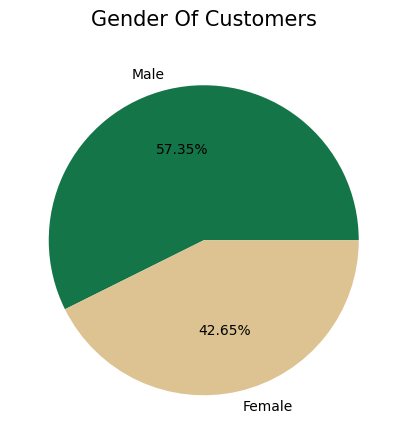

In [74]:
gender = customer_behaviour['gender'].value_counts()
plt.figure(figsize=(5,6))
plt.pie(gender, labels=gender.index, autopct='%1.2f%%', colors=[starbucks_pie[gen] for gen in gender.index])
plt.title('Gender Of Customers', loc='center', pad=15, fontsize=15)
plt.show()

Note : Customer didominasi oleh pria

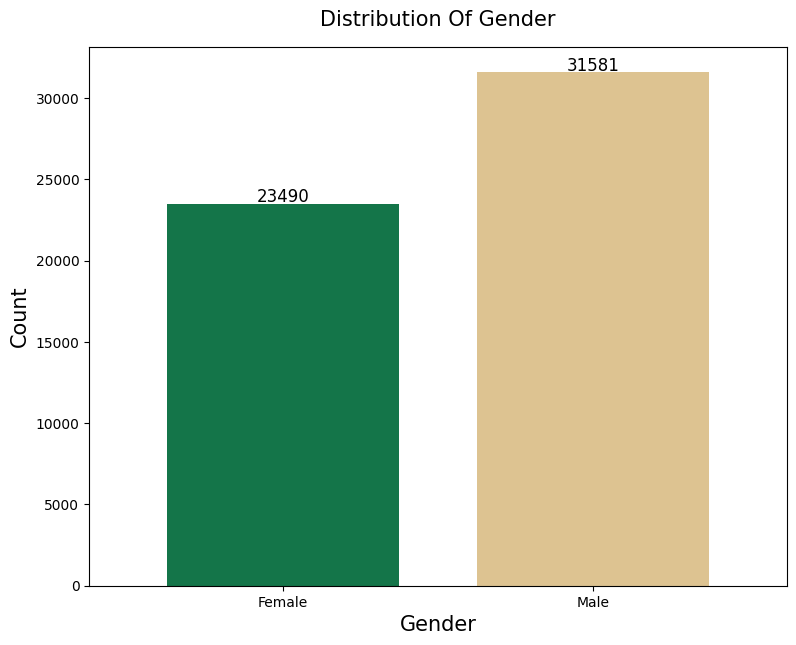

In [75]:
plt.figure(figsize=(9,7))
gender = customer_behaviour['gender'].value_counts()
highest_value = gender.max()
ax = gender.sort_index().plot(kind='bar', color='#147549', width=0.75)

for bar in ax.patches:
    if bar.get_height() == highest_value:
        bar.set_facecolor('#DDC391')
    ax.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.title('Distribution Of Gender', loc='center', pad=15, fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Count', fontsize=15)


plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

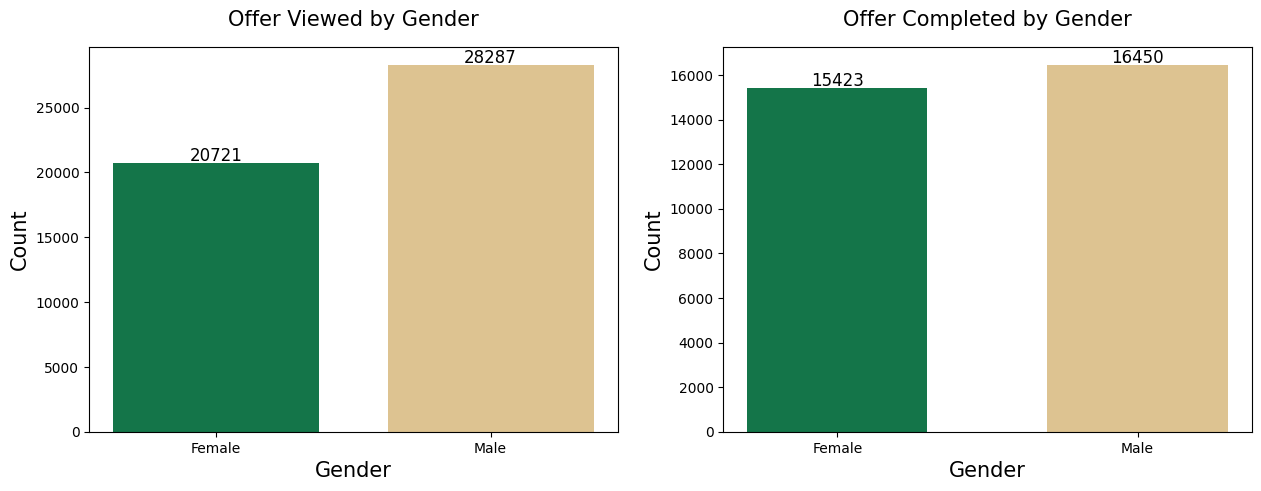

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

offer_viewed_gender = customer_behaviour.groupby('gender')['num_of_offer_viewed'].sum()
highest_value_viewed = offer_viewed_gender.max()
offer_viewed_gender = offer_viewed_gender.sort_index()

axs[0].bar(offer_viewed_gender.index, offer_viewed_gender, color='#147549', width=0.75)

for bar in axs[0].patches:
    if bar.get_height() == highest_value_viewed:
        bar.set_facecolor('#DDC391')

axs[0].set_title('Offer Viewed by Gender', loc='center', pad=15, fontsize=15)
axs[0].set_xlabel('Gender', fontsize=15)
axs[0].set_ylabel('Count', fontsize=15)

for bar in axs[0].patches:
    axs[0].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[0].set_ylim(ymin=0)
axs[0].tick_params(axis='x', rotation=0)

offer_completed_gender = customer_behaviour.groupby('gender')['num_of_offer_completed'].sum()
highest_value_completed = offer_completed_gender.max()
offer_completed_gender = offer_completed_gender.sort_index()

axs[1].bar(offer_completed_gender.index, offer_completed_gender, color='#147549', width=0.6)

for bar in axs[1].patches:
    if bar.get_height() == highest_value_completed:
        bar.set_facecolor('#DDC391')

axs[1].set_title('Offer Completed by Gender', loc='center', pad=15, fontsize=15)
axs[1].set_xlabel('Gender', fontsize=15)
axs[1].set_ylabel('Count', fontsize=15)

for bar in axs[1].patches:
    axs[1].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[1].set_ylim(ymin=0)
axs[1].tick_params(axis='x', rotation=0)

plt.show()

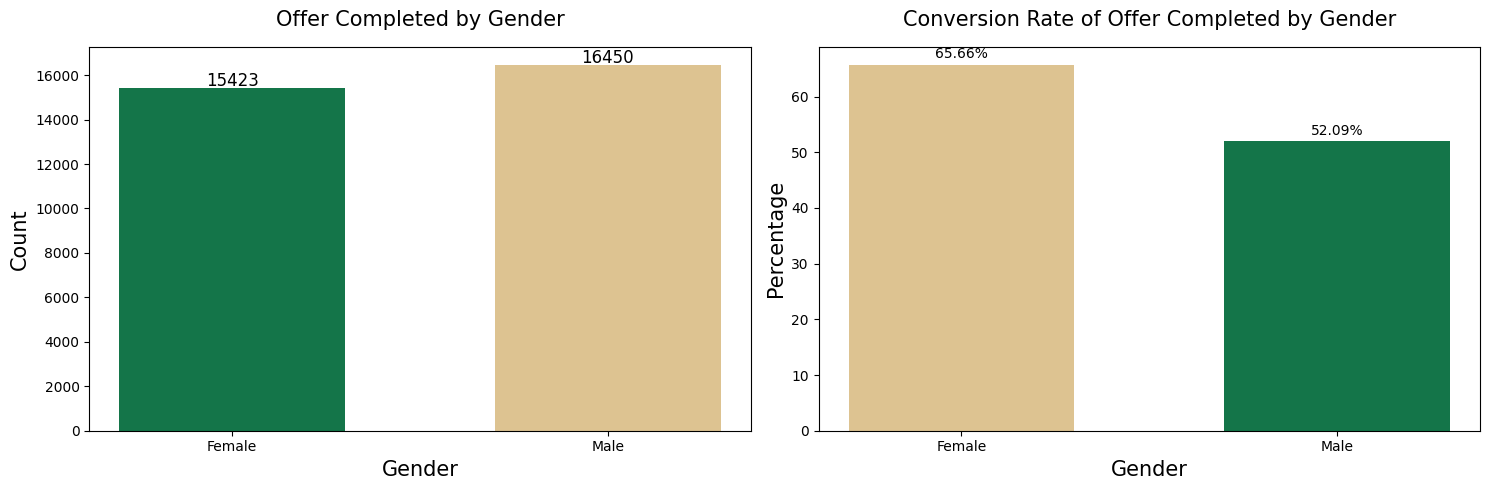

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

offer_completed_gender = customer_behaviour.groupby('gender')['num_of_offer_completed'].sum()
highest_value_completed = offer_completed_gender.max()
offer_completed_gender = offer_completed_gender.sort_index()

axs[0].bar(offer_completed_gender.index, offer_completed_gender, color='#147549', width=0.6)

for bar in axs[0].patches:
    if bar.get_height() == highest_value_completed:
        bar.set_facecolor('#DDC391')

axs[0].set_title('Offer Completed by Gender', loc='center', pad=15, fontsize=15)
axs[0].set_xlabel('Gender', fontsize=15)
axs[0].set_ylabel('Count', fontsize=15)

for bar in axs[0].patches:
    axs[0].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[0].set_ylim(ymin=0)
axs[0].tick_params(axis='x', rotation=0)


#plot conversion rate
gender_conv_rate = customer_behaviour.groupby('gender')['num_of_offer_completed'].agg(['sum', 'count'])
gender_conv_rate['percentage'] = (gender_conv_rate['sum'] / gender_conv_rate['count']) * 100
highest_value = gender_conv_rate['percentage'].max()

# Plot kedua
axs[1].bar(gender_conv_rate.index, gender_conv_rate['percentage'].sort_index(), color='#147549', width=0.6)

# Highlight nilai tertinggi
for bar in axs[1].patches:
    if bar.get_height() == highest_value:
        bar.set_facecolor('#DDC391')

# Pengaturan tambahan untuk subplot kedua
axs[1].set_title('Conversion Rate of Offer Completed by Gender', loc='center', pad=15, fontsize=15)
axs[1].set_xlabel('Gender', fontsize=15)
axs[1].set_ylabel('Percentage', fontsize=15)

for p in axs[1].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    axs[1].annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center')

axs[1].set_ylim(ymin=0)
axs[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

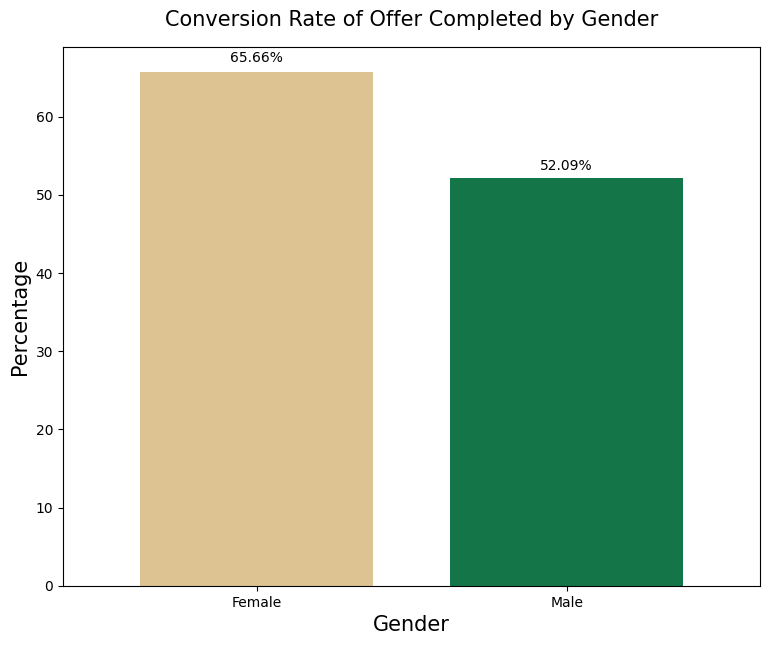

In [78]:
gender_conv_rate = customer_behaviour.groupby('gender')['num_of_offer_completed'].agg(['sum', 'count'])
gender_conv_rate['percentage'] = (gender_conv_rate['sum'] / gender_conv_rate['count']) * 100
highest_value = gender_conv_rate['percentage'].max()

plt.figure(figsize=(9,7))
ax = gender_conv_rate['percentage'].sort_index().plot(kind='bar', color='#147549', width=0.75)

for bar in ax.patches:
    if bar.get_height() == highest_value:
        bar.set_facecolor('#DDC391')

plt.title('Conversion Rate of Offer Completed by Gender', loc='center', pad=15, fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center')

plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

Note : Baik offer viewed maupun offer completed keduanya sama-sama didominasi oleh pria

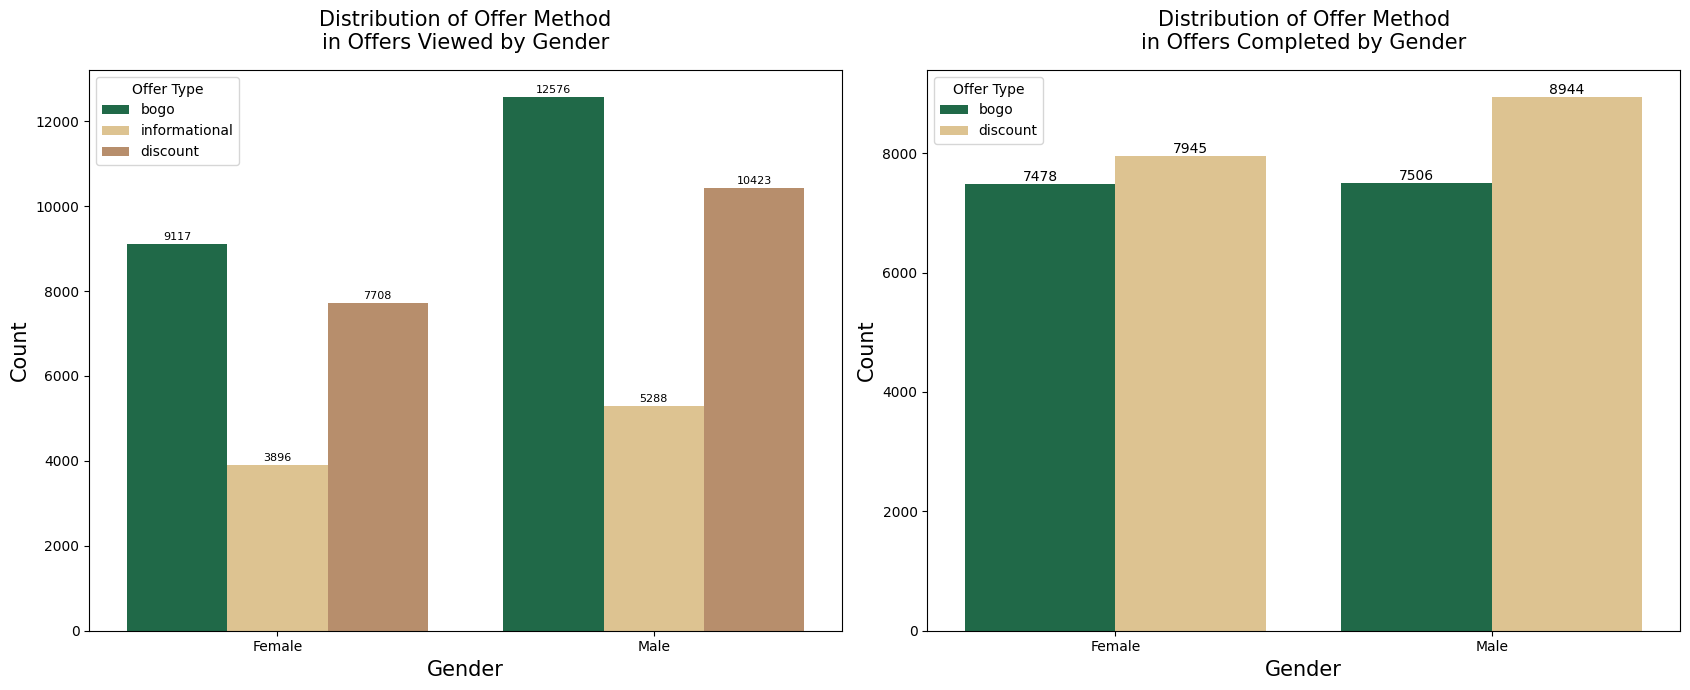

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(17, 7))

ax_view = sns.countplot(x="gender", hue="offer_type", data=df_offer_viewed, palette=starbucks_color, ax=axs[0])
for bar in ax_view.patches:
    ax_view.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                     textcoords='offset points')
axs[0].set_title('Distribution of Offer Method\nin Offers Viewed by Gender', fontsize=15, pad=15)
axs[0].set_ylabel('Count', fontsize=15)
axs[0].set_xlabel('Gender', fontsize=15)
axs[0].legend(title='Offer Type', fontsize=15, prop={'size': 10}, loc='upper left')

ax_comp = sns.countplot(x="gender", hue="offer_type", data=df_offer_completed, palette=starbucks_color, ax=axs[1])
for bar in ax_comp.patches:
    ax_comp.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')
axs[1].set_title('Distribution of Offer Method\nin Offers Completed by Gender', fontsize=15, pad=15)
axs[1].set_ylabel('Count', fontsize=15)
axs[1].set_xlabel('Gender', fontsize=15)
axs[1].legend(title='Offer Type', fontsize=15, prop={'size': 10})

plt.tight_layout()
plt.show()


Note : 
- Pada offer viewed, baik pria maupun wanita lebih tertarik untuk melihat jenis penawaran bogo dibanding penawaran lainnya
- Sedangkan pada offer completed, baik pria maupun wanita lebih tertarik untuk menyelesaikan atau dengan kata lain membeli dengan menggunakan penawaran Discount
- Tidak satupun customers membeli dari hasil penawaran Informational

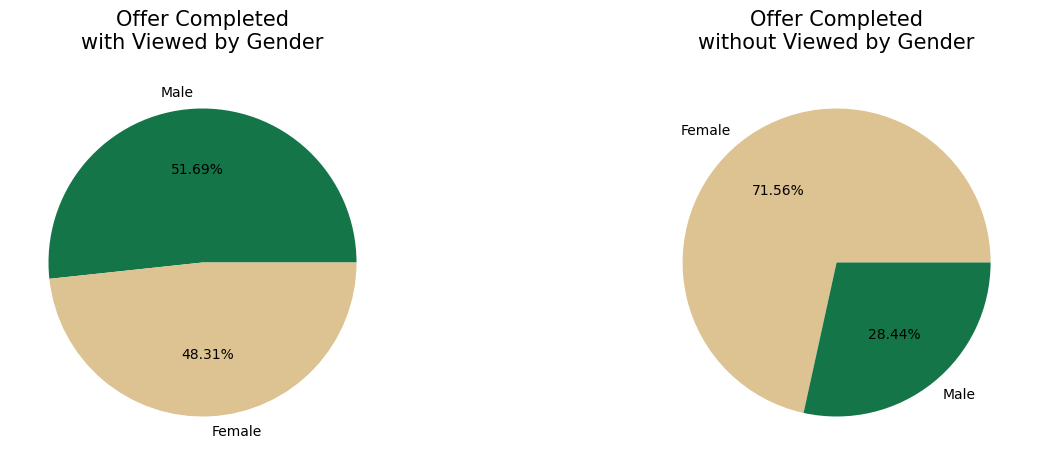

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot pertama (grafik pie - Viewed and Completed)
view_comp_gender = ids_viewed_completed['gender'].value_counts()
axs[0].pie(view_comp_gender, labels=view_comp_gender.index, autopct='%1.2f%%', colors=[starbucks_pie[vc] for vc in view_comp_gender.index])
axs[0].set_title('Offer Completed\nwith Viewed by Gender', loc='center', pad=15, fontsize=15)

# Plot kedua (grafik pie - Completed without Viewed)
comp_no_view = ids_only_in_completed['gender'].value_counts()
axs[1].pie(comp_no_view, labels=comp_no_view.index, autopct='%1.2f%%', colors=[starbucks_pie[cv] for cv in comp_no_view.index])
axs[1].set_title('Offer Completed\nwithout Viewed by Gender', loc='center', pad=15, fontsize=15)

# Menampilkan plot
plt.show()

Note : 
- "Offer completed with viewed" berarti bahwa customer melakukan pembelian menggunakan penawaran setelah melihat penawaran tersebut terlebih dahulu. Persentase pembelian menggunakan penawaran setelah dilihat lebih tinggi pada pria daripada wanita.
- "Offer completed without viewed" berarti bahwa customer melakukan pembelian menggunakan penawaran tanpa melihat penawaran tersebut terlebih dahulu atau dengan kata lain customer membeli menggunakan penawaran tanpa disengaja. Persentase pembelian menggunakan penawaran tanpa melihat penawaran lebih tinggi wanita daripada pria.

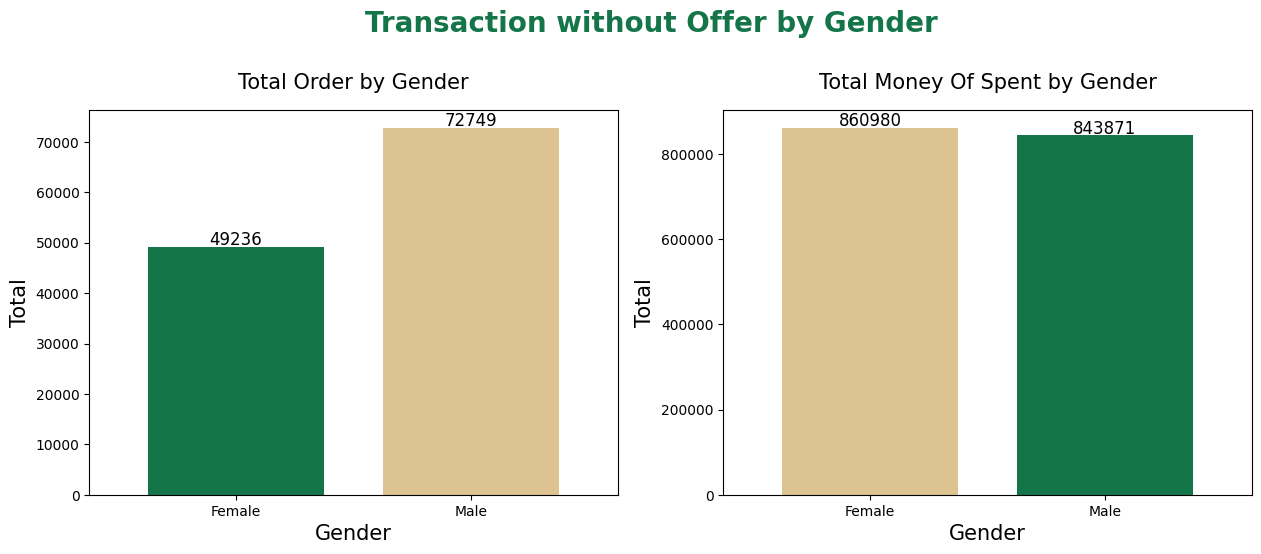

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle('Transaction without Offer by Gender', fontsize=20, fontweight='bold', y=1.08, color = '#147549')

## --Total Order
count_order = df_transaction['gender'].value_counts()
highest_value_viewed = count_order.max()
count_order = count_order.sort_index()

count_order.plot(kind='bar', color='#147549', width=0.75, legend=False, ax=axs[0])

for bar in axs[0].patches:
    if bar.get_height() == highest_value_viewed:
        bar.set_facecolor('#DDC391')

axs[0].set_title('Total Order by Gender', loc='center', pad=15, fontsize=15)
axs[0].set_xlabel('Gender', fontsize=15)
axs[0].set_ylabel('Total', fontsize=15)

for bar in axs[0].patches:
    axs[0].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[0].set_ylim(ymin=0)
axs[0].tick_params(axis='x', rotation=0)


total_amount = df_transaction.groupby('gender')[['amount']].sum()
highest_value = total_amount['amount'].max()

## --Total Amount
total_amount.sort_index().plot(kind='bar', color='#147549', width=0.75, legend=False, ax=axs[1])
for bar in axs[1].patches:
    if bar.get_height() == highest_value:
        bar.set_facecolor('#DDC391')

axs[1].set_title('Total Money Of Spent by Gender', loc='center', pad=15, fontsize=15)
axs[1].set_xlabel('Gender', fontsize=15)
axs[1].set_ylabel('Total', fontsize=15)

for bar in axs[1].patches:
    axs[1].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[1].set_ylim(ymin=0)
axs[1].tick_params(axis='x', rotation=0)

plt.show()

Note : Pria memiliki jumlah order lebih banyak dibanding wanita, tetapi wanita memiliki total belanja lebih besar dibanding pria

### Age Group

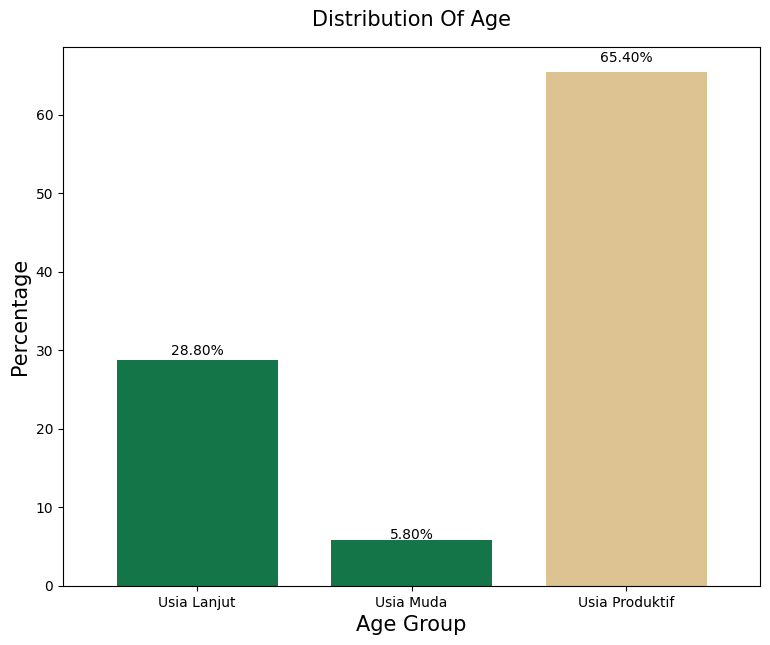

In [82]:
plt.figure(figsize=(9,7))
age_percentage = (customer_behaviour['age_group'].value_counts() / customer_behaviour.shape[0] * 100).round(1)
highest_value = age_percentage.max()
ax = age_percentage.sort_index().plot(kind='bar', color='#147549', width=0.75)

for bar in ax.patches:
    if bar.get_height() == highest_value:
        bar.set_facecolor('#DDC391')

plt.title('Distribution Of Age', loc='center', pad=15, fontsize=15)
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%',(x + width/2, y + height*1.02), ha='center')
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

Note : Customer di dominasi oleh usia produktif

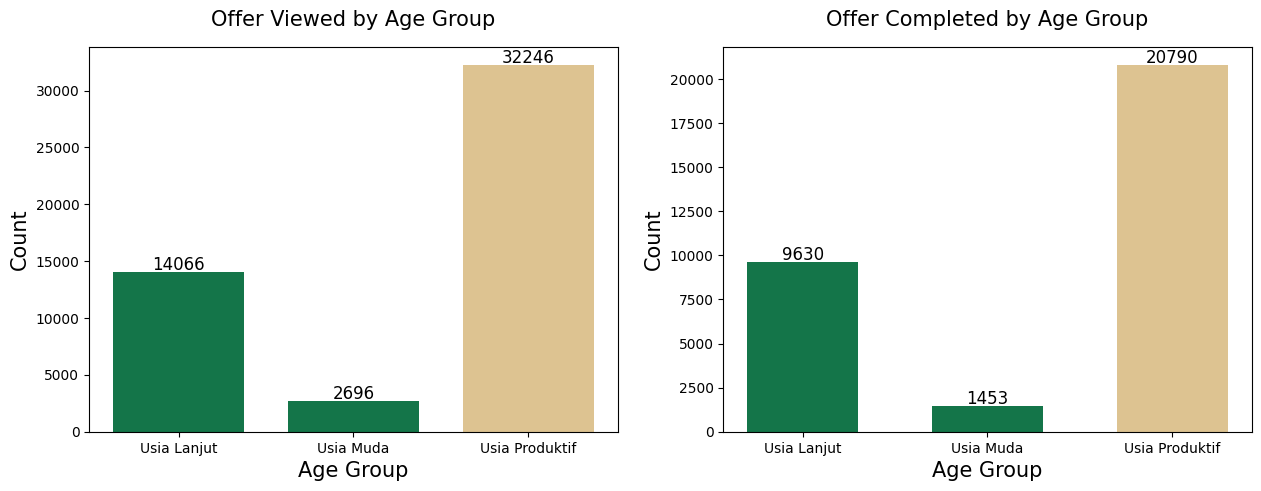

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

offer_viewed_age = df_offer_viewed['age_group'].value_counts()
highest_value_viewed = offer_viewed_age.max()
offer_viewed_age = offer_viewed_age.sort_index()

axs[0].bar(offer_viewed_age.index, offer_viewed_age, color='#147549', width=0.75)

for bar in axs[0].patches:
    if bar.get_height() == highest_value_viewed:
        bar.set_facecolor('#DDC391')

axs[0].set_title('Offer Viewed by Age Group', loc='center', pad=15, fontsize=15)
axs[0].set_xlabel('Age Group', fontsize=15)
axs[0].set_ylabel('Count', fontsize=15)

for bar in axs[0].patches:
    axs[0].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[0].set_ylim(ymin=0)
axs[0].tick_params(axis='x', rotation=0)

offer_completed_age = df_offer_completed['age_group'].value_counts()
highest_value_completed = offer_completed_age.max()
offer_completed_age = offer_completed_age.sort_index()

axs[1].bar(offer_completed_age.index, offer_completed_age, color='#147549', width=0.6)

for bar in axs[1].patches:
    if bar.get_height() == highest_value_completed:
        bar.set_facecolor('#DDC391')

axs[1].set_title('Offer Completed by Age Group', loc='center', pad=15, fontsize=15)
axs[1].set_xlabel('Age Group', fontsize=15)
axs[1].set_ylabel('Count', fontsize=15)

for bar in axs[1].patches:
    axs[1].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[1].set_ylim(ymin=0)
axs[1].tick_params(axis='x', rotation=0)

plt.show()

Note : Baik offer viewed maupun offer completed keduanya sama-sama didominasi oleh Usia Produktif

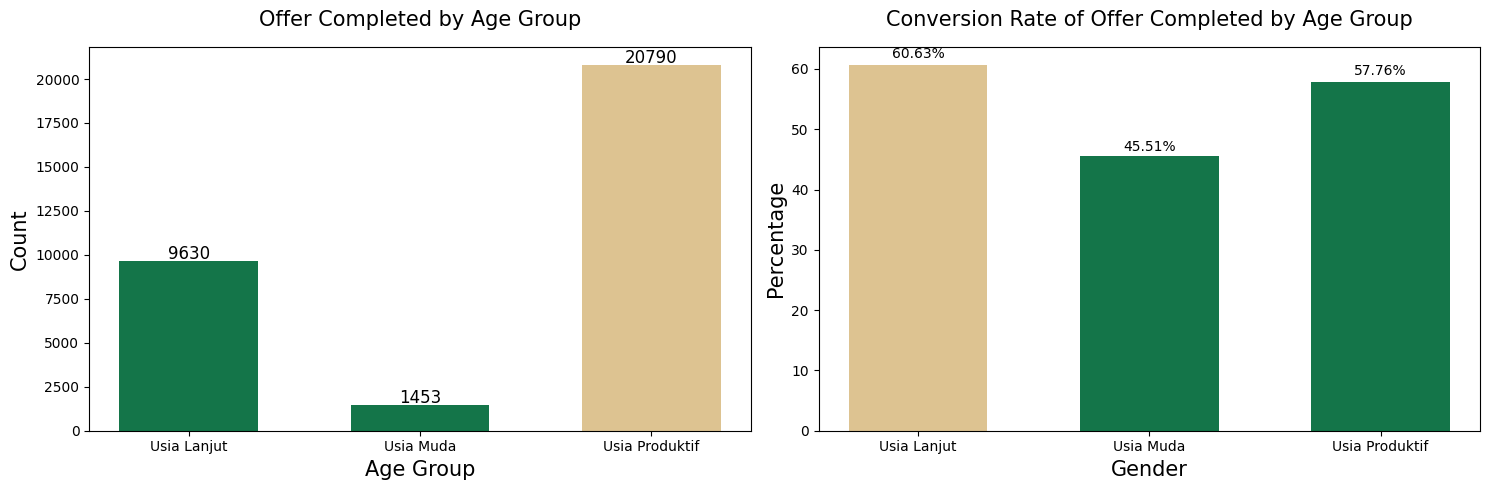

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

offer_completed_age = df_offer_completed['age_group'].value_counts()
highest_value_completed = offer_completed_age.max()
offer_completed_age = offer_completed_age.sort_index()

axs[0].bar(offer_completed_age.index, offer_completed_age, color='#147549', width=0.6)

for bar in axs[0].patches:
    if bar.get_height() == highest_value_completed:
        bar.set_facecolor('#DDC391')

axs[0].set_title('Offer Completed by Age Group', loc='center', pad=15, fontsize=15)
axs[0].set_xlabel('Age Group', fontsize=15)
axs[0].set_ylabel('Count', fontsize=15)

for bar in axs[0].patches:
    axs[0].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[0].set_ylim(ymin=0)
axs[0].tick_params(axis='x', rotation=0)


#plot conversion rate
age_conv_rate = customer_behaviour.groupby('age_group')['num_of_offer_completed'].agg(['sum', 'count'])
age_conv_rate['percentage'] = (age_conv_rate['sum'] / age_conv_rate['count']) * 100
highest_value = age_conv_rate['percentage'].max()

# Plot kedua
axs[1].bar(age_conv_rate.index, age_conv_rate['percentage'].sort_index(), color='#147549', width=0.6)

# Highlight nilai tertinggi
for bar in axs[1].patches:
    if bar.get_height() == highest_value:
        bar.set_facecolor('#DDC391')

# Pengaturan tambahan untuk subplot kedua
axs[1].set_title('Conversion Rate of Offer Completed by Age Group', loc='center', pad=15, fontsize=15)
axs[1].set_xlabel('Gender', fontsize=15)
axs[1].set_ylabel('Percentage', fontsize=15)

for p in axs[1].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    axs[1].annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center')

axs[1].set_ylim(ymin=0)
axs[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

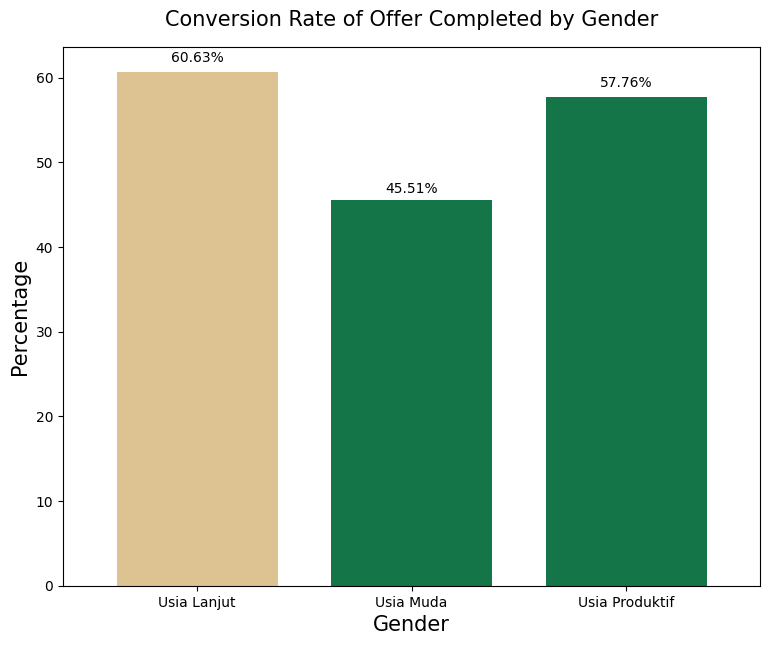

In [85]:
gender_conv_rate = customer_behaviour.groupby('age_group')['num_of_offer_completed'].agg(['sum', 'count'])
gender_conv_rate['percentage'] = (gender_conv_rate['sum'] / gender_conv_rate['count']) * 100
highest_value = gender_conv_rate['percentage'].max()

plt.figure(figsize=(9,7))
ax = gender_conv_rate['percentage'].sort_index().plot(kind='bar', color='#147549', width=0.75)

for bar in ax.patches:
    if bar.get_height() == highest_value:
        bar.set_facecolor('#DDC391')

plt.title('Conversion Rate of Offer Completed by Gender', loc='center', pad=15, fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center')

plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

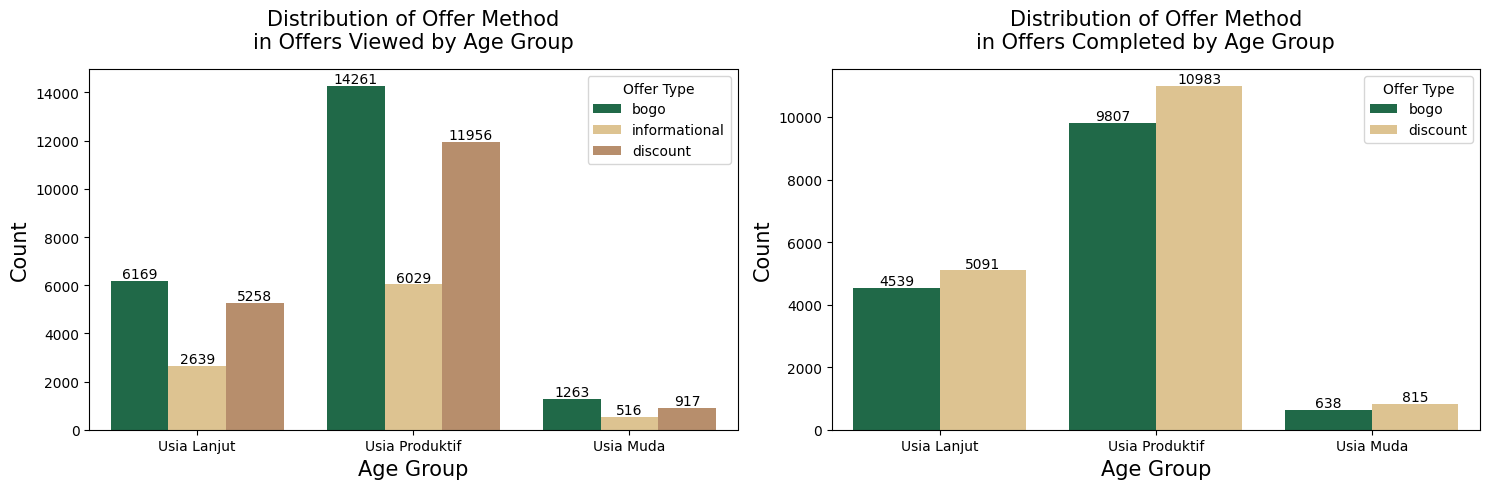

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

ax_view = sns.countplot(x="age_group", hue="offer_type", data=df_offer_viewed, palette=starbucks_color, ax=axs[0])
for bar in ax_view.patches:
    ax_view.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')
axs[0].set_title('Distribution of Offer Method\nin Offers Viewed by Age Group', fontsize=15, pad=15)
axs[0].set_ylabel('Count', fontsize=15)
axs[0].set_xlabel('Age Group', fontsize=15)
axs[0].legend(title='Offer Type', fontsize=15, prop={'size': 10})

ax_comp = sns.countplot(x="age_group", hue="offer_type", data=df_offer_completed, palette=starbucks_color, ax=axs[1])
for bar in ax_comp.patches:
    ax_comp.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')
axs[1].set_title('Distribution of Offer Method\nin Offers Completed by Age Group', fontsize=15, pad=15)
axs[1].set_ylabel('Count', fontsize=15)
axs[1].set_xlabel('Age Group', fontsize=15)
axs[1].legend(title='Offer Type', fontsize=15, prop={'size': 10})

plt.tight_layout()
plt.show()

Note : 
- Pada offer viewed, baik usia lanjut, usia produktif, maupun usia muda lebih tertarik untuk melihat jenis penawaran bogo dibanding penawaran lainnya
- Sedangkan pada offer completed, baik usia lanjut, usia produktif, maupun usia muda lebih tertarik untuk menyelesaikan atau dengan kata lain membeli dengan menggunakan penawaran discount dibanding penawaran lainnya
- Tidak satupun customers membeli dari hasil penawaran Informational

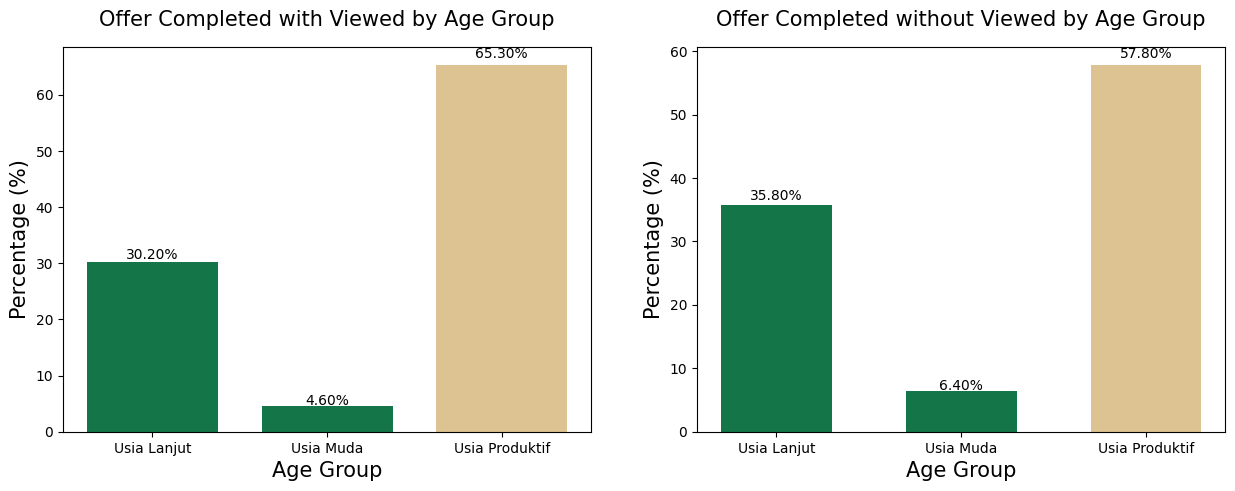

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

#Completed With Viewed
view_comp_age = (ids_viewed_completed['age_group'].value_counts() / ids_viewed_completed.shape[0] * 100).round(1)
highest_value_viewed = view_comp_age.max()
view_comp_age = view_comp_age.sort_index()

axs[0].bar(view_comp_age.index, view_comp_age, color='#147549', width=0.75)

for bar in axs[0].patches:
    if bar.get_height() == highest_value_viewed:
        bar.set_facecolor('#DDC391')

axs[0].set_title('Offer Completed with Viewed by Age Group', loc='center', pad=15, fontsize=15)
axs[0].set_xlabel('Age Group', fontsize=15)
axs[0].set_ylabel('Percentage (%)', fontsize=15)

for p in axs[0].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    axs[0].annotate(f'{height:.2f}%',(x + width/2, y + height*1.02), ha='center')
    
axs[0].set_ylim(ymin=0)
axs[0].tick_params(axis='x', rotation=0)


#Completed without viewed
comp_no_view_age = (ids_only_in_completed['age_group'].value_counts() / ids_only_in_completed.shape[0] * 100).round(1)
highest_value_completed = comp_no_view_age.max()
comp_no_view_age = comp_no_view_age.sort_index()

axs[1].bar(comp_no_view_age.index, comp_no_view_age, color='#147549', width=0.6)

for bar in axs[1].patches:
    if bar.get_height() == highest_value_completed:
        bar.set_facecolor('#DDC391')

axs[1].set_title('Offer Completed without Viewed by Age Group', loc='center', pad=15, fontsize=15)
axs[1].set_xlabel('Age Group', fontsize=15)
axs[1].set_ylabel('Percentage (%)', fontsize=15)

for p in axs[1].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    axs[1].annotate(f'{height:.2f}%',(x + width/2, y + height*1.02), ha='center')
    
axs[1].set_ylim(ymin=0)
axs[1].tick_params(axis='x', rotation=0)

plt.show()

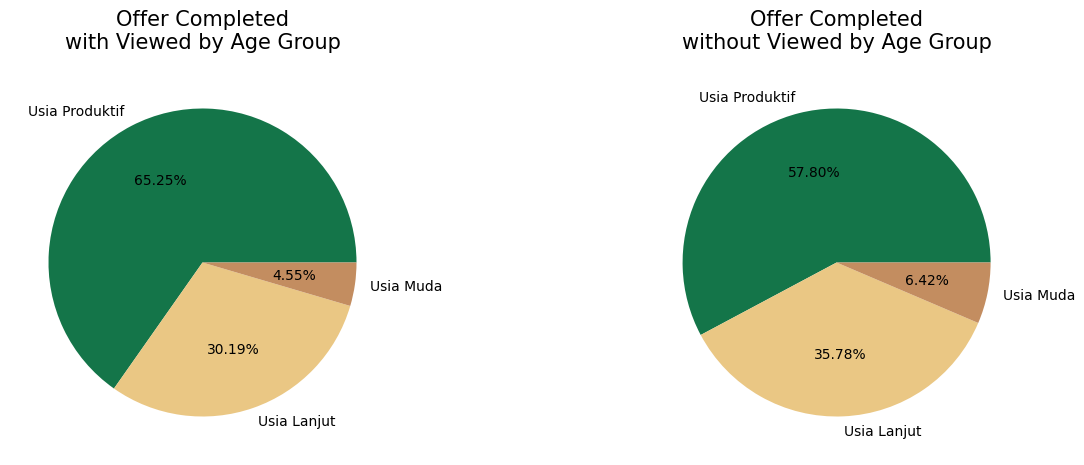

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot pertama (grafik pie - Viewed and Completed)
view_comp_age = ids_viewed_completed['age_group'].value_counts()
axs[0].pie(view_comp_age, labels=view_comp_age.index, autopct='%1.2f%%', colors=starbucks_color)
axs[0].set_title('Offer Completed\nwith Viewed by Age Group', loc='center', pad=15, fontsize=15)

# Plot kedua (grafik pie - Completed without Viewed)
comp_no_view_age = ids_only_in_completed['age_group'].value_counts()
axs[1].pie(comp_no_view_age, labels=comp_no_view_age.index, autopct='%1.2f%%', colors=starbucks_color)
axs[1].set_title('Offer Completed\nwithout Viewed by Age Group', loc='center', pad=15, fontsize=15)

# Menampilkan plot
plt.show()

Note : 
- "Offer completed with viewed" berarti bahwa customer melakukan pembelian menggunakan penawaran setelah melihat penawaran tersebut terlebih dahulu. 
- "Offer completed without viewed" berarti bahwa customer melakukan pembelian menggunakan penawaran tanpa melihat penawaran tersebut terlebih dahulu atau dengan kata lain customer membeli menggunakan penawaran tanpa disengaja. 

Baik offer completed with maupun without viewed persentase lebih tinggi usia produktif, usia lanjut, barulah usia muda.

C:\Users\hp\AppData\Local\Temp\ipykernel_11076\2293538690.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels([f'{int(val/1000)}K' for val in axs[1].get_yticks()])


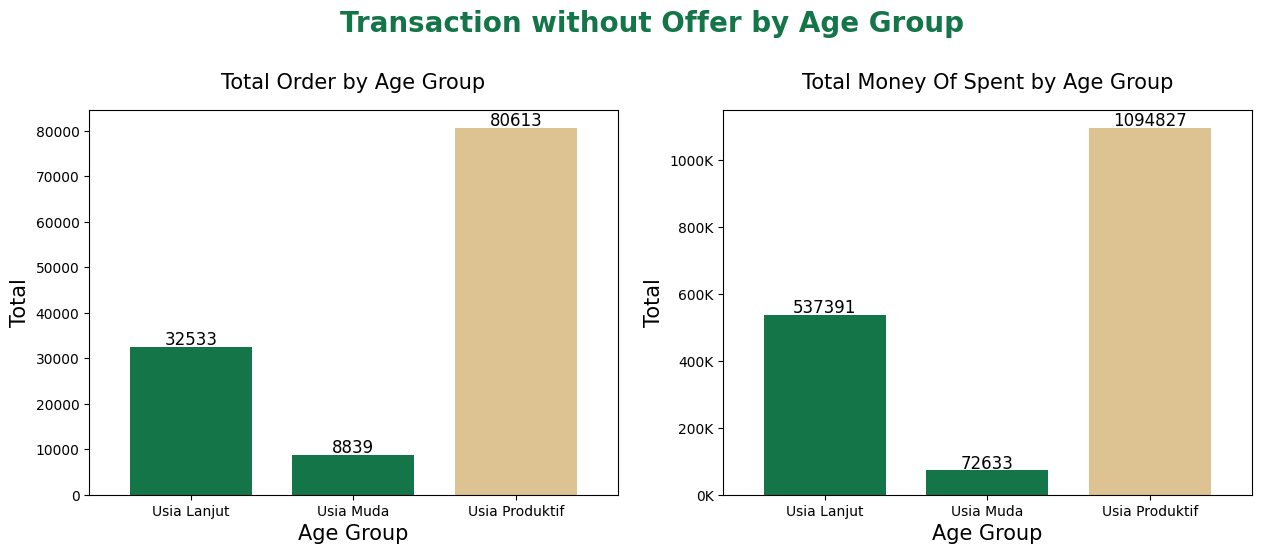

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle('Transaction without Offer by Age Group', fontsize=20, fontweight='bold', y=1.08, color = '#147549')

## --Total Order
count_order_age = df_transaction['age_group'].value_counts()
highest_value_viewed = count_order_age.max()
count_order_age = count_order_age.sort_index()

count_order_age.plot(kind='bar', color='#147549', width=0.75, legend=False, ax=axs[0])

for bar in axs[0].patches:
    if bar.get_height() == highest_value_viewed:
        bar.set_facecolor('#DDC391')

axs[0].set_title('Total Order by Age Group', loc='center', pad=15, fontsize=15)
axs[0].set_xlabel('Age Group', fontsize=15)
axs[0].set_ylabel('Total', fontsize=15)

for bar in axs[0].patches:
    axs[0].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[0].set_ylim(ymin=0)
axs[0].tick_params(axis='x', rotation=0)

## --Total Amount
total_amount_age = df_transaction.groupby('age_group')[['amount']].sum()
highest_value = total_amount_age['amount'].max()

total_amount_age.sort_index().plot(kind='bar', color='#147549', width=0.75, legend=False, ax=axs[1])
for bar in axs[1].patches:
    if bar.get_height() == highest_value:
        bar.set_facecolor('#DDC391')

axs[1].set_title('Total Money Of Spent by Age Group', loc='center', pad=15, fontsize=15)
axs[1].set_xlabel('Age Group', fontsize=15)
axs[1].set_ylabel('Total', fontsize=15)

for bar in axs[1].patches:
    axs[1].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[1].set_ylim(ymin=0)
axs[1].set_yticklabels([f'{int(val/1000)}K' for val in axs[1].get_yticks()])
axs[1].tick_params(axis='x', rotation=0)

plt.show()

Note : Baik total order maupun total belanja semuanya di dominasi oleh usia produktif

### Income

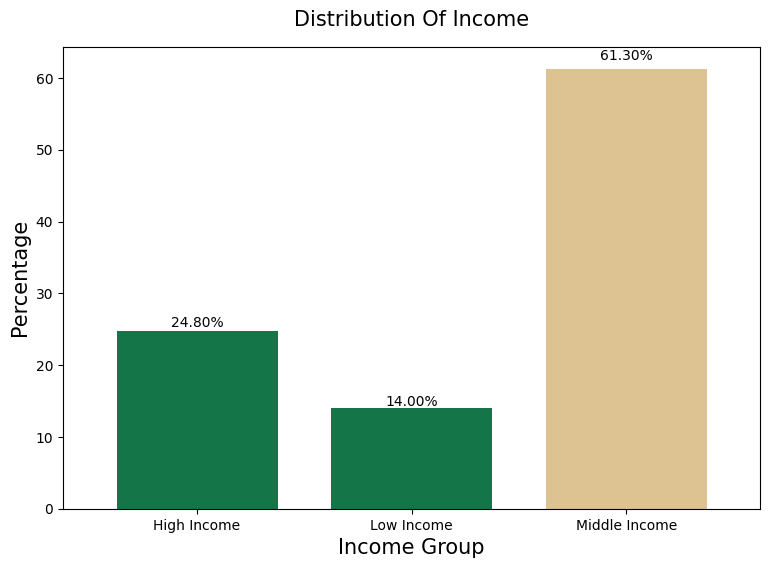

In [90]:
plt.figure(figsize=(9,6))
income_percentage = (customer_behaviour['income_group'].value_counts() / customer_behaviour.shape[0] * 100).round(1)
highest_value = income_percentage.max()
ax = income_percentage.sort_index().plot(kind='bar', color='#147549', width=0.75)

for bar in ax.patches:
    if bar.get_height() == highest_value:
        bar.set_facecolor('#DDC391')
        
plt.title('Distribution Of Income', loc='center', pad=15, fontsize=15)
plt.xlabel('Income Group', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

for i in ax.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{height:.2f}%',(x + width/2, y + height*1.02), ha='center')
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

Note : Customer di dominasi oleh golongan pendapatan menengah

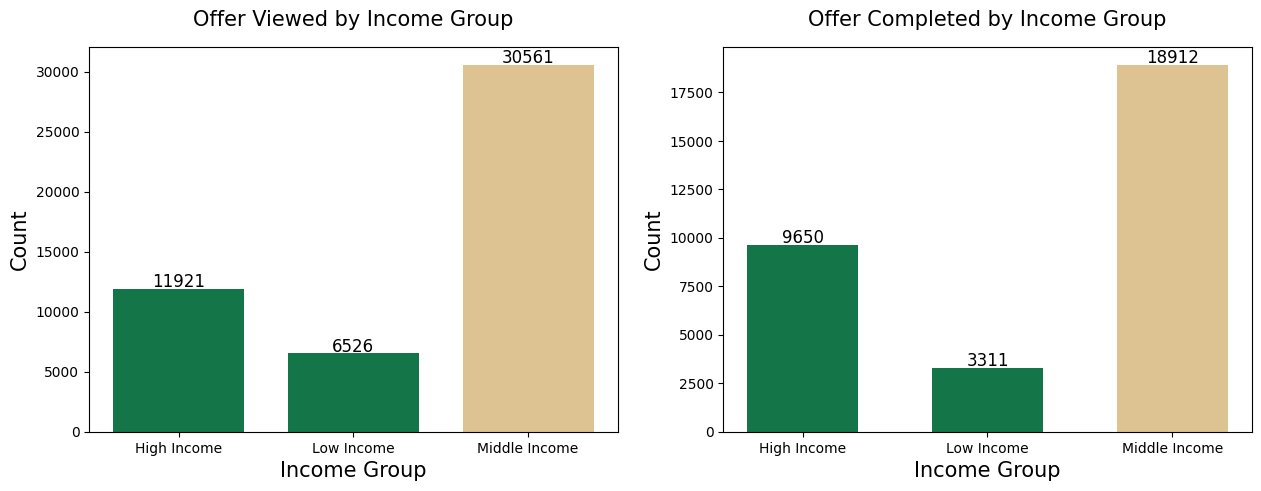

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

offer_viewed_income = df_offer_viewed['income_group'].value_counts()
highest_value_viewed = offer_viewed_income.max()
offer_viewed_income = offer_viewed_income.sort_index()

axs[0].bar(offer_viewed_income.index, offer_viewed_income, color='#147549', width=0.75)

for bar in axs[0].patches:
    if bar.get_height() == highest_value_viewed:
        bar.set_facecolor('#DDC391')

axs[0].set_title('Offer Viewed by Income Group', loc='center', pad=15, fontsize=15)
axs[0].set_xlabel('Income Group', fontsize=15)
axs[0].set_ylabel('Count', fontsize=15)

for bar in axs[0].patches:
    axs[0].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[0].set_ylim(ymin=0)
axs[0].tick_params(axis='x', rotation=0)

offer_completed_income = df_offer_completed['income_group'].value_counts()
highest_value_completed = offer_completed_income.max()
offer_completed_income = offer_completed_income.sort_index()

axs[1].bar(offer_completed_income.index, offer_completed_income, color='#147549', width=0.6)

for bar in axs[1].patches:
    if bar.get_height() == highest_value_completed:
        bar.set_facecolor('#DDC391')

axs[1].set_title('Offer Completed by Income Group', loc='center', pad=15, fontsize=15)
axs[1].set_xlabel('Income Group', fontsize=15)
axs[1].set_ylabel('Count', fontsize=15)

for bar in axs[1].patches:
    axs[1].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[1].set_ylim(ymin=0)
axs[1].tick_params(axis='x', rotation=0)

plt.show()

Note : Baik offer viewed maupun offer completed keduanya sama-sama didominasi oleh Middle Income atau customer dengan pendapatan golongan menengah

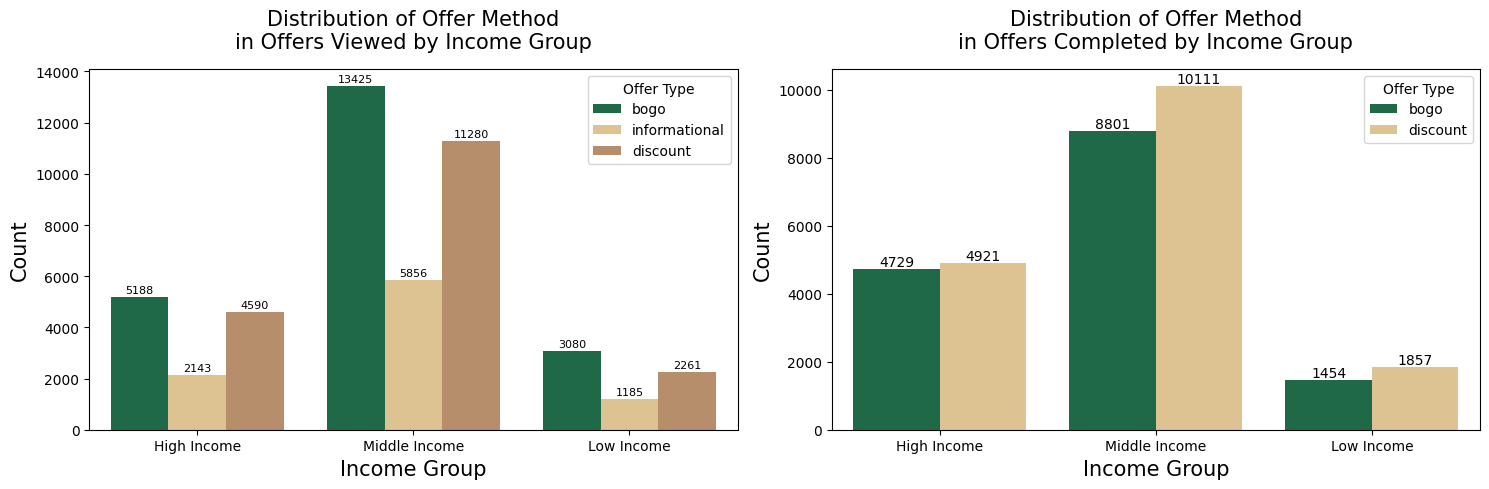

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

ax_view = sns.countplot(x="income_group", hue="offer_type", data=df_offer_viewed, palette=starbucks_color, ax=axs[0])
for bar in ax_view.patches:
    ax_view.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                     textcoords='offset points')
axs[0].set_title('Distribution of Offer Method\nin Offers Viewed by Income Group', fontsize=15, pad=15)
axs[0].set_ylabel('Count', fontsize=15)
axs[0].set_xlabel('Income Group', fontsize=15)
axs[0].legend(title='Offer Type', fontsize=15, prop={'size': 10})

ax_comp = sns.countplot(x="income_group", hue="offer_type", data=df_offer_completed, palette=starbucks_color, ax=axs[1])
for bar in ax_comp.patches:
    ax_comp.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')
axs[1].set_title('Distribution of Offer Method\nin Offers Completed by Income Group', fontsize=15, pad=15)
axs[1].set_ylabel('Count', fontsize=15)
axs[1].set_xlabel('Income Group', fontsize=15)
axs[1].legend(title='Offer Type', fontsize=15, prop={'size': 10})

plt.tight_layout()
plt.show()

Note : 
- Pada offer viewed, baik high, middle maupun low income lebih tertarik untuk melihat jenis penawaran bogo dibanding penawaran lainnya
- Sedangkan pada offer completed, baik high, middle maupun low income lebih tertarik untuk menyelesaikan atau dengan kata lain membeli dengan menggunakan penawaran discount dibanding penawaran lainnya
- Tidak satupun customers membeli dari hasil penawaran Informational

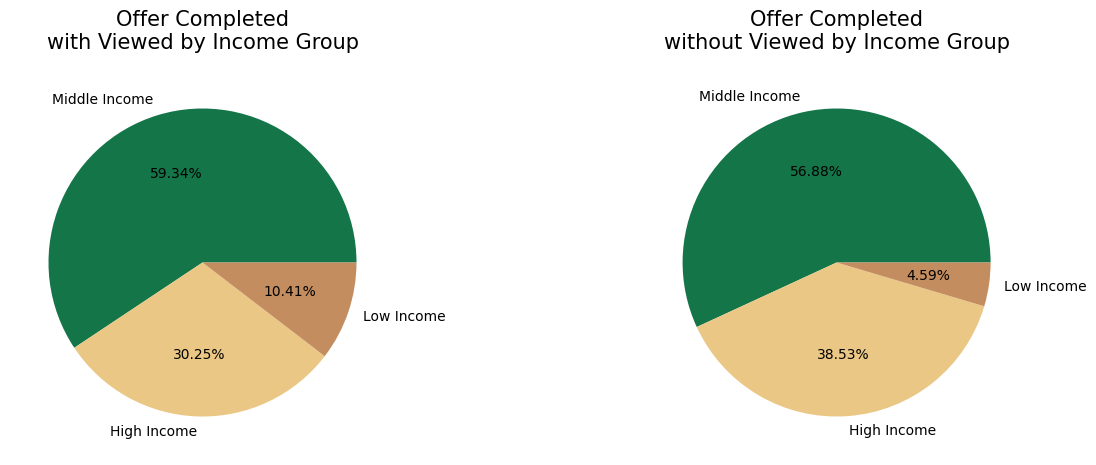

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot pertama (grafik pie - Viewed and Completed)
view_comp_income = ids_viewed_completed['income_group'].value_counts()
axs[0].pie(view_comp_income, labels=view_comp_income.index, autopct='%1.2f%%', colors=starbucks_color)
axs[0].set_title('Offer Completed\nwith Viewed by Income Group', loc='center', pad=15, fontsize=15)

# Plot kedua (grafik pie - Completed without Viewed)
comp_no_view_income = ids_only_in_completed['income_group'].value_counts()
axs[1].pie(comp_no_view_income, labels=comp_no_view_income.index, autopct='%1.2f%%', colors=starbucks_color)
axs[1].set_title('Offer Completed\nwithout Viewed by Income Group', loc='center', pad=15, fontsize=15)

# Menampilkan plot
plt.show()

Note : 
- "Offer completed with viewed" berarti bahwa customer melakukan pembelian menggunakan penawaran setelah melihat penawaran tersebut terlebih dahulu. 
- "Offer completed without viewed" berarti bahwa customer melakukan pembelian menggunakan penawaran tanpa melihat penawaran tersebut terlebih dahulu atau dengan kata lain customer membeli menggunakan penawaran tanpa disengaja. 

Baik offer completed with maupun without viewed persentase lebih tinggi golongan menengah, tinggi, barulah rendah.

C:\Users\hp\AppData\Local\Temp\ipykernel_11076\3997473658.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels([f'{int(val/1000)}K' for val in axs[1].get_yticks()])


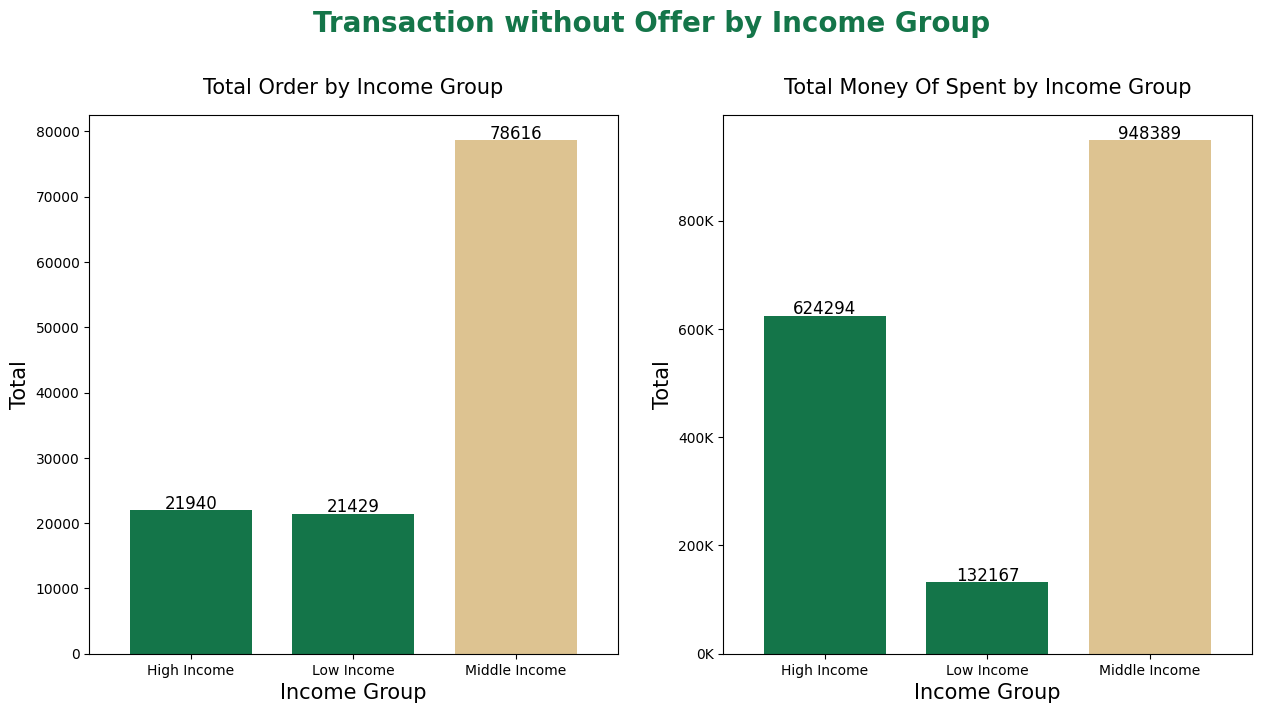

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.suptitle('Transaction without Offer by Income Group', fontsize=20, fontweight='bold', y=1.03, color = '#147549')

## --Total Order
count_order_income = df_transaction['income_group'].value_counts()
highest_value_viewed = count_order_income.max()
count_order_income = count_order_income.sort_index()

count_order_income.plot(kind='bar', color='#147549', width=0.75, legend=False, ax=axs[0])

for bar in axs[0].patches:
    if bar.get_height() == highest_value_viewed:
        bar.set_facecolor('#DDC391')

axs[0].set_title('Total Order by Income Group', loc='center', pad=15, fontsize=15)
axs[0].set_xlabel('Income Group', fontsize=15)
axs[0].set_ylabel('Total', fontsize=15)

for bar in axs[0].patches:
    axs[0].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[0].set_ylim(ymin=0)
axs[0].tick_params(axis='x', rotation=0)


## --Total Amount
total_amount_income = df_transaction.groupby('income_group')[['amount']].sum()
highest_value = total_amount_income['amount'].max()

total_amount_income.sort_index().plot(kind='bar', color='#147549', width=0.75, legend=False, ax=axs[1])
for bar in axs[1].patches:
    if bar.get_height() == highest_value:
        bar.set_facecolor('#DDC391')

axs[1].set_title('Total Money Of Spent by Income Group', loc='center', pad=15, fontsize=15)
axs[1].set_xlabel('Income Group', fontsize=15)
axs[1].set_ylabel('Total', fontsize=15)

for bar in axs[1].patches:
    axs[1].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[1].set_ylim(ymin=0)
axs[1].set_yticklabels([f'{int(val/1000)}K' for val in axs[1].get_yticks()])
axs[1].tick_params(axis='x', rotation=0)

plt.show()

Note : Baik total order maupun total belanja semuanya di dominasi oleh middle income

### Channel Promotions

In [95]:
columns_to_copy = ['num_of_email', 'num_of_mobile', 'num_of_social', 'num_of_web']

df_offer_channels = customer_behaviour[columns_to_copy].copy()
df_offer_channels

,num_of_email,num_of_mobile,num_of_social,num_of_web
0,3,3,2,3
1,5,5,3,4
2,4,4,3,3
3,0,0,0,0
4,3,3,3,3
...,...,...,...,...
55066,0,0,0,0
55067,6,5,1,6
55068,6,5,1,6
55069,6,5,1,6


In [96]:
columns_to_copy = ['email', 'mobile', 'social', 'web']

df_offer_channels_view = df_offer_viewed[columns_to_copy].copy()
df_offer_channels_view

,email,mobile,social,web
1,1.0,1.0,0.0,1.0
6,1.0,1.0,1.0,0.0
11,1.0,1.0,1.0,0.0
17,1.0,1.0,1.0,1.0
19,1.0,1.0,0.0,1.0
...,...,...,...,...
268330,1.0,1.0,1.0,1.0
268334,1.0,1.0,1.0,1.0
268338,1.0,1.0,0.0,1.0
268340,1.0,1.0,1.0,1.0


In [97]:
columns_to_copy = ['email', 'mobile', 'social', 'web']

df_offer_channels_comp = df_offer_completed[columns_to_copy].copy()
df_offer_channels_comp

,email,mobile,social,web
3,1.0,1.0,0.0,1.0
14,1.0,1.0,1.0,0.0
15,1.0,1.0,1.0,1.0
28,1.0,1.0,0.0,1.0
29,1.0,1.0,1.0,1.0
...,...,...,...,...
268285,1.0,1.0,0.0,1.0
268299,1.0,1.0,1.0,1.0
268306,1.0,1.0,1.0,1.0
268315,1.0,1.0,1.0,1.0


In [98]:
columns_to_copy = ['email', 'mobile', 'social', 'web']

ids_channels_view_comp = ids_viewed_completed[columns_to_copy].copy()
ids_channels_view_comp

,email,mobile,social,web
3,1.0,1.0,0.0,1.0
14,1.0,1.0,1.0,0.0
15,1.0,1.0,1.0,1.0
28,1.0,1.0,0.0,1.0
29,1.0,1.0,1.0,1.0
...,...,...,...,...
268285,1.0,1.0,0.0,1.0
268299,1.0,1.0,1.0,1.0
268306,1.0,1.0,1.0,1.0
268315,1.0,1.0,1.0,1.0


In [99]:
columns_to_copy = ['email', 'mobile', 'social', 'web']

ids_channels_only_comp = ids_only_in_completed[columns_to_copy].copy()
ids_channels_only_comp

,email,mobile,social,web
1134,1.0,1.0,0.0,1.0
9693,1.0,1.0,0.0,1.0
11956,1.0,0.0,0.0,1.0
11963,1.0,1.0,0.0,1.0
14915,1.0,1.0,1.0,0.0
...,...,...,...,...
267369,1.0,1.0,0.0,1.0
267928,1.0,1.0,0.0,1.0
267983,1.0,1.0,1.0,0.0
267984,1.0,0.0,0.0,1.0


In [100]:
customer_offers

,person,event,total_reward,difficulty_avg,num_of_email,num_of_mobile,num_of_social,num_of_web,num_of_bogo,num_of_discount,num_of_informational,num_of_offer_received,num_of_offer_viewed,num_of_offer_completed,num_of_transaction,money_of_spent
0,0009655768c64bdeb2e877511632db8f,offer completed,9.0,8.333333,3.0,3.0,2.0,3.0,1.0,2.0,0.0,0,0,3,0,0.00
1,0009655768c64bdeb2e877511632db8f,offer received,9.0,5.000000,5.0,5.0,3.0,4.0,1.0,2.0,2.0,5,0,0,0,0.00
2,0009655768c64bdeb2e877511632db8f,offer viewed,7.0,3.750000,4.0,4.0,3.0,3.0,1.0,1.0,2.0,0,4,0,0,0.00
3,0009655768c64bdeb2e877511632db8f,transaction,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,8,127.60
4,0020c2b971eb4e9188eac86d93036a77,offer completed,14.0,10.000000,3.0,3.0,3.0,3.0,1.0,2.0,0.0,0,0,3,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55066,fffad4f4828548d1b5583907f2e9906b,transaction,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,12,88.83
55067,ffff82501cea40309d5fdd7edcca4a07,offer completed,18.0,10.833333,6.0,5.0,1.0,6.0,1.0,5.0,0.0,0,0,6,0,0.00
55068,ffff82501cea40309d5fdd7edcca4a07,offer received,18.0,10.833333,6.0,5.0,1.0,6.0,1.0,5.0,0.0,6,0,0,0,0.00
55069,ffff82501cea40309d5fdd7edcca4a07,offer viewed,18.0,10.833333,6.0,5.0,1.0,6.0,1.0,5.0,0.0,0,6,0,0,0.00


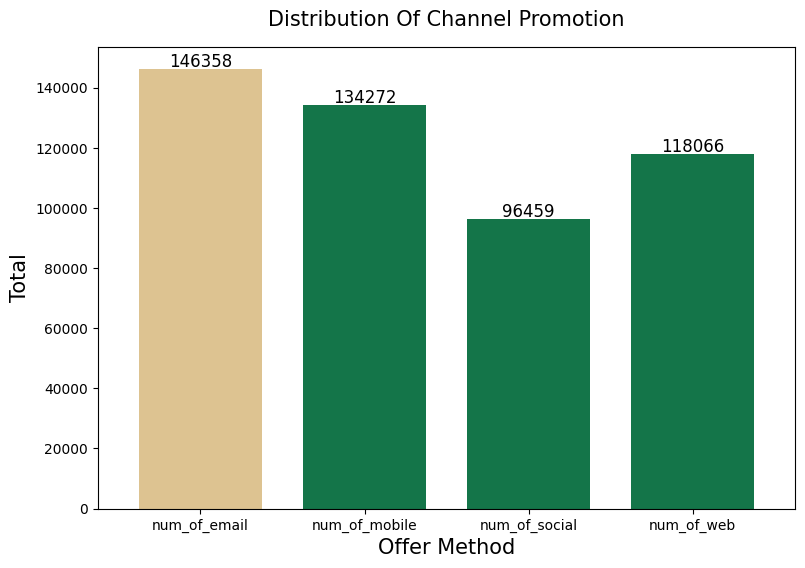

In [101]:
plt.figure(figsize=(9,6))
offer_channels = df_offer_channels.sum()
highest_value = offer_channels.max()
ax = offer_channels.sort_index().plot(kind='bar', color='#147549', width=0.75)

for bar in ax.patches:
    if bar.get_height() == highest_value:
        bar.set_facecolor('#DDC391')
        
plt.title('Distribution Of Channel Promotion', loc='center', pad=15, fontsize=15)
plt.xlabel('Offer Method', fontsize=15)
plt.ylabel('Total', fontsize=15)

for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

Note : Promosi paling banyak dilakukan melalui layanan email

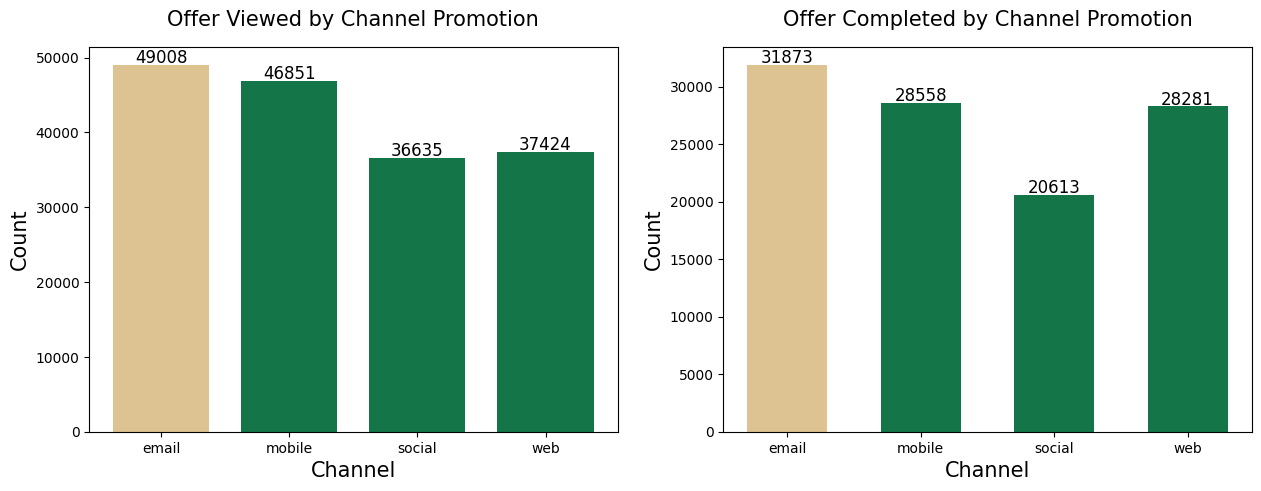

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

offer_viewed_channel = df_offer_channels_view.sum()
highest_value_viewed = offer_viewed_channel.max()
offer_viewed_channel = offer_viewed_channel.sort_index()

axs[0].bar(offer_viewed_channel.index, offer_viewed_channel, color='#147549', width=0.75)

for bar in axs[0].patches:
    if bar.get_height() == highest_value_viewed:
        bar.set_facecolor('#DDC391')

axs[0].set_title('Offer Viewed by Channel Promotion', loc='center', pad=15, fontsize=15)
axs[0].set_xlabel('Channel', fontsize=15)
axs[0].set_ylabel('Count', fontsize=15)

for bar in axs[0].patches:
    axs[0].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[0].set_ylim(ymin=0)
axs[0].tick_params(axis='x', rotation=0)

offer_completed_channel = df_offer_channels_comp.sum()
highest_value_completed = offer_completed_channel.max()
offer_completed_channel = offer_completed_channel.sort_index()

axs[1].bar(offer_completed_channel.index, offer_completed_channel, color='#147549', width=0.6)

for bar in axs[1].patches:
    if bar.get_height() == highest_value_completed:
        bar.set_facecolor('#DDC391')

axs[1].set_title('Offer Completed by Channel Promotion', loc='center', pad=15, fontsize=15)
axs[1].set_xlabel('Channel', fontsize=15)
axs[1].set_ylabel('Count', fontsize=15)

for bar in axs[1].patches:
    axs[1].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[1].set_ylim(ymin=0)
axs[1].tick_params(axis='x', rotation=0)

plt.show()

Note : 
Baik pada offer viewed maupun offer completed, keduanya di dominasi oleh penggunaan promosi yang diterima oleh pelanggan melalui layanan Email

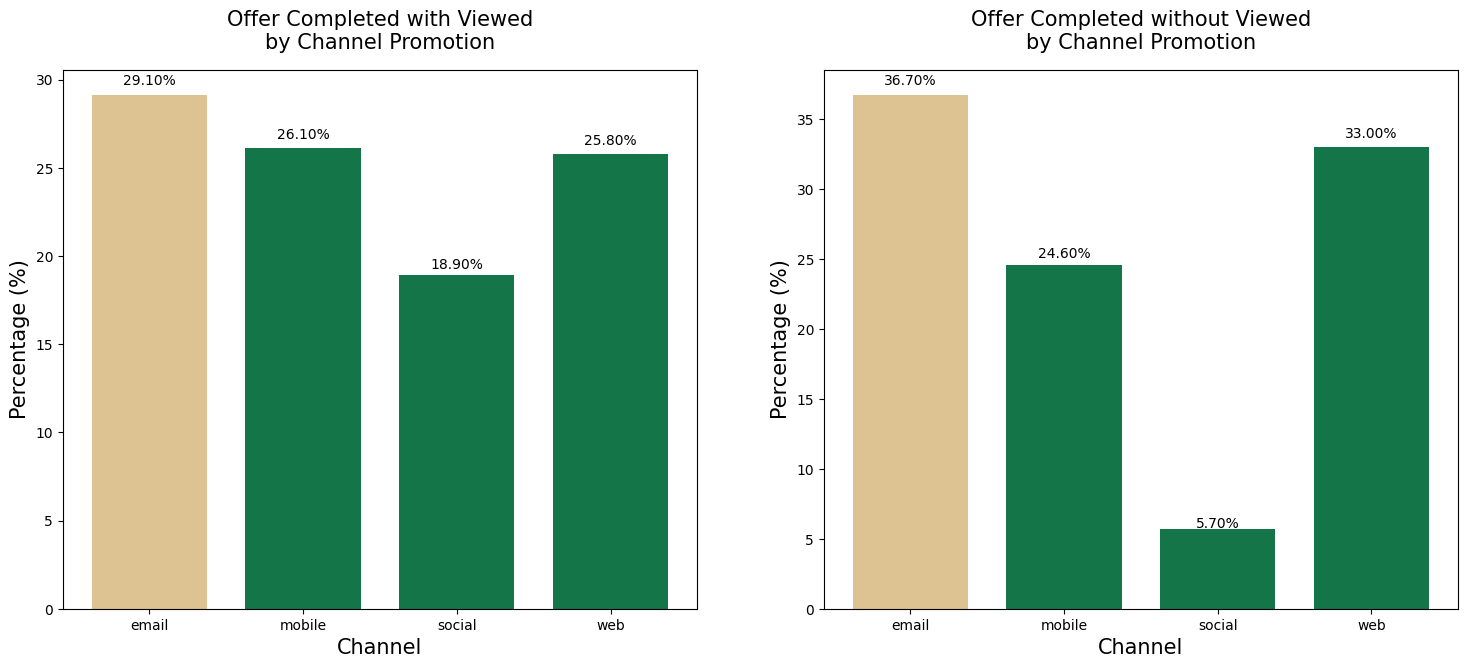

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

#Completed With Viewed
view_comp_channel = (ids_channels_view_comp.sum() / ids_channels_view_comp.sum().sum() * 100).round(1)
highest_value_viewed = view_comp_channel.max()
view_comp_channel = view_comp_channel.sort_index()

axs[0].bar(view_comp_channel.index, view_comp_channel, color='#147549', width=0.75)

for bar in axs[0].patches:
    if bar.get_height() == highest_value_viewed:
        bar.set_facecolor('#DDC391')

axs[0].set_title('Offer Completed with Viewed\nby Channel Promotion', loc='center', pad=15, fontsize=15)
axs[0].set_xlabel('Channel', fontsize=15)
axs[0].set_ylabel('Percentage (%)', fontsize=15)

for p in axs[0].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    axs[0].annotate(f'{height:.2f}%',(x + width/2, y + height*1.02), ha='center')
    
axs[0].set_ylim(ymin=0)
axs[0].tick_params(axis='x', rotation=0)


#Completed without viewed
comp_no_view_channel = (ids_channels_only_comp.sum() / ids_channels_only_comp.sum().sum() * 100).round(1)
highest_value_completed = comp_no_view_channel.max()
comp_no_view_channel = comp_no_view_channel.sort_index()

axs[1].bar(comp_no_view_channel.index, comp_no_view_channel, color='#147549', width=0.75)

for bar in axs[1].patches:
    if bar.get_height() == highest_value_completed:
        bar.set_facecolor('#DDC391')

axs[1].set_title('Offer Completed without Viewed\nby Channel Promotion', loc='center', pad=15, fontsize=15)
axs[1].set_xlabel('Channel', fontsize=15)
axs[1].set_ylabel('Percentage (%)', fontsize=15)

for p in axs[1].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    axs[1].annotate(f'{height:.2f}%',(x + width/2, y + height*1.02), ha='center')
    
axs[1].set_ylim(ymin=0)
axs[1].tick_params(axis='x', rotation=0)

plt.show()

Note : 
- "Offer completed with viewed" berarti bahwa customer melakukan pembelian menggunakan penawaran setelah melihat penawaran tersebut terlebih dahulu. 
- "Offer completed without viewed" berarti bahwa customer melakukan pembelian menggunakan penawaran tanpa melihat penawaran tersebut terlebih dahulu atau dengan kata lain customer membeli menggunakan penawaran tanpa disengaja. 

   - Baik offer completed with maupun without viewed persentase paling tinggi pada channel promotion Email.
   - Persentase tertinggi kedua pada offer with viewed ada pada mobile, sementara pada offer without viewed persentase tertinggi kedua adalah web
   - Persentase terendah baik pada offer completed with maupun without viewed ada pada social.


### Offer Type

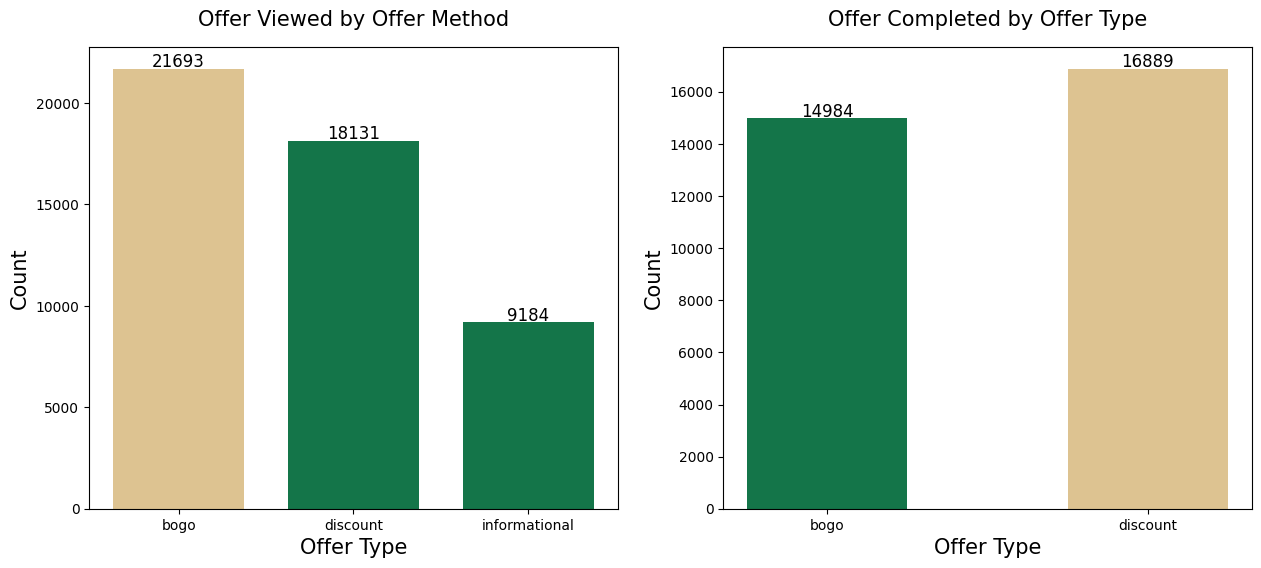

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

offer_viewed_method = df_offer_viewed['offer_type'].value_counts()
highest_value_viewed = offer_viewed_method.max()
offer_viewed_method = offer_viewed_method.sort_index()

axs[0].bar(offer_viewed_method.index, offer_viewed_method, color='#147549', width=0.75)

for bar in axs[0].patches:
    if bar.get_height() == highest_value_viewed:
        bar.set_facecolor('#DDC391')

axs[0].set_title('Offer Viewed by Offer Method', loc='center', pad=15, fontsize=15)
axs[0].set_xlabel('Offer Type', fontsize=15)
axs[0].set_ylabel('Count', fontsize=15)

for bar in axs[0].patches:
    axs[0].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[0].set_ylim(ymin=0)
axs[0].tick_params(axis='x', rotation=0)

offer_completed_method = df_offer_completed['offer_type'].value_counts()
highest_value_completed = offer_completed_method.max()
offer_completed_method = offer_completed_method.sort_index()

axs[1].bar(offer_completed_method.index, offer_completed_method, color='#147549', width=0.5)

for bar in axs[1].patches:
    if bar.get_height() == highest_value_completed:
        bar.set_facecolor('#DDC391')

axs[1].set_title('Offer Completed by Offer Type', loc='center', pad=15, fontsize=15)
axs[1].set_xlabel('Offer Type', fontsize=15)
axs[1].set_ylabel('Count', fontsize=15)

for bar in axs[1].patches:
    axs[1].annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[1].set_ylim(ymin=0)
axs[1].tick_params(axis='x', rotation=0)

plt.show()

Note : Ketika mendapatkan informasi penawaran, customer lebih tertarik untuk melihat penawaran bogo, tetapi ketika membeli lebih tertarik untuk menggunakan penawaran diskon

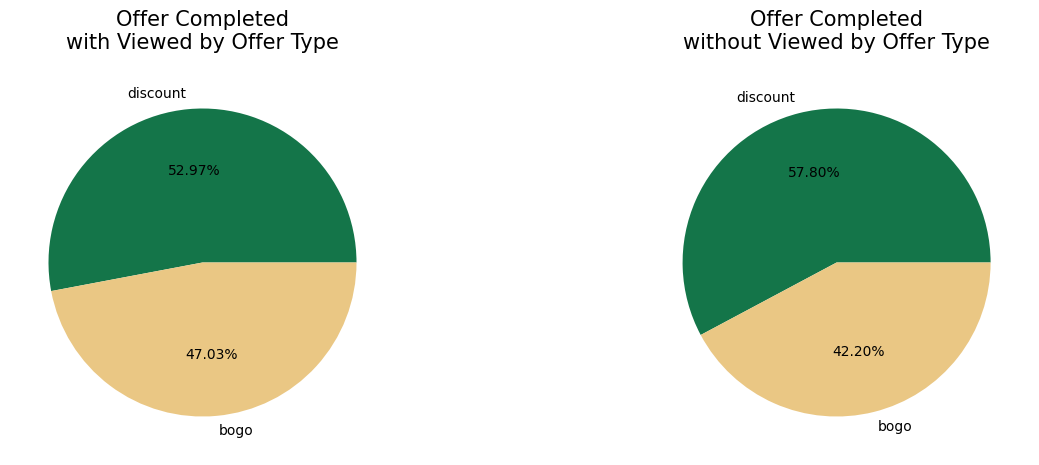

In [105]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot pertama (grafik pie - Viewed and Completed)
view_comp_type = ids_viewed_completed['offer_type'].value_counts()
axs[0].pie(view_comp_type, labels=view_comp_type.index, autopct='%1.2f%%', colors=starbucks_color)
axs[0].set_title('Offer Completed\nwith Viewed by Offer Type', loc='center', pad=15, fontsize=15)

# Plot kedua (grafik pie - Completed without Viewed)
comp_no_view_type = ids_only_in_completed['offer_type'].value_counts()
axs[1].pie(comp_no_view_type, labels=comp_no_view_type.index, autopct='%1.2f%%', colors=starbucks_color)
axs[1].set_title('Offer Completed\nwithout Viewed by Offer Type', loc='center', pad=15, fontsize=15)

# Menampilkan plot
plt.show()

Note : 
- "Offer completed with viewed" berarti bahwa customer melakukan pembelian menggunakan penawaran setelah melihat penawaran tersebut terlebih dahulu. 
- "Offer completed without viewed" berarti bahwa customer melakukan pembelian menggunakan penawaran tanpa melihat penawaran tersebut terlebih dahulu atau dengan kata lain customer membeli menggunakan penawaran tanpa disengaja. 

Baik "Offer completed with maupun without viewed" Persentase pembelian menggunakan penawaran lebih tinggi menggunakan diskon daripada bogo.

### Offer Received without Viewed

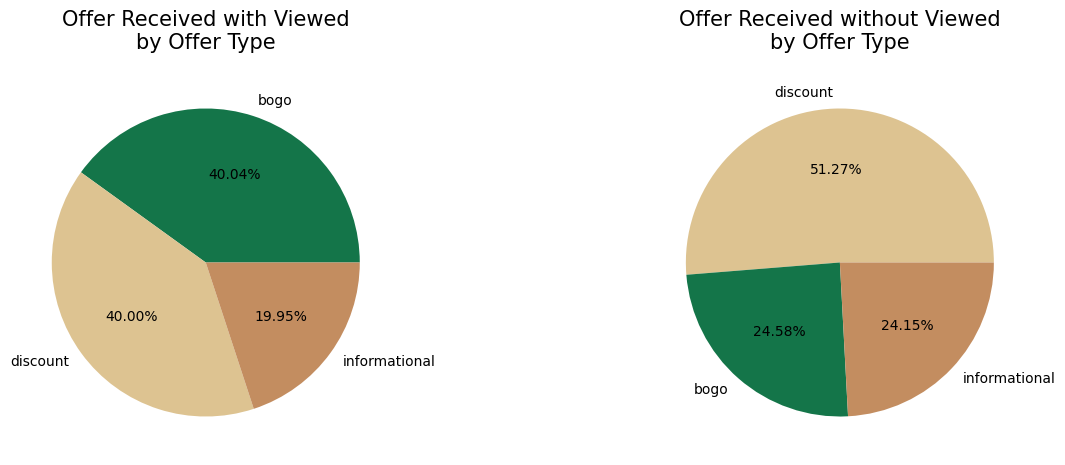

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot pertama (grafik pie - Viewed and Completed)
view_received_type = ids_viewed_received['offer_type'].value_counts()
axs[0].pie(view_received_type, labels=view_received_type.index, autopct='%1.2f%%', colors=[starbucks_pie[vr] for vr in view_received_type.index])
axs[0].set_title('Offer Received with Viewed\nby Offer Type', loc='center', pad=15, fontsize=15)

# Plot kedua (grafik pie - Completed without Viewed)
received_no_view_type = ids_only_in_received['offer_type'].value_counts()
axs[1].pie(received_no_view_type, labels=received_no_view_type.index, autopct='%1.2f%%', colors=[starbucks_pie[vr] for vr in received_no_view_type.index])
axs[1].set_title('Offer Received without Viewed\nby Offer Type', loc='center', pad=15, fontsize=15)

# Menampilkan plot
plt.show()

Note : 
- "Offer received with viewed" berarti bahwa customer melihat/membuka penawaran setelah mendapatkan penawaran tersebut. 
- "Offer received without viewed" berarti bahwa customer hanya menerima penawaran, dan tidak membuka/melihat penawaran tersebut. 

  Pada "Offer received with viewed" penawaran bogo dan discount keduanya hanya berbeda 0,01% dengan bogo lebih tinggi.

  Pada "Offer received without viewed" penawaran discount memiliki tingkat persentase tertinggi. itu artinya pada penawaran yang tidak dilihat sama sekali adalah penawaran discount. Ini berkaitan dengan grafik sebelumnya, yaitu persentase paling tinggi customer untuk melihat jenis penawaran adalah jenis bogo. tetapi untuk membelinya/completed offer adalah menggunakan metode diskon.

### Without Membership

In [107]:
without_member

,person,event,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.00
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4,0.00
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00
6,c4863c7985cf408faee930f111475da3,offer received,0,0,1,0,0,2298d6c36e964ae4a3e7e9706d1fb8c2,0.00
10,744d603ef08c4f33af5a61c8c7628d1c,offer received,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.00
...,...,...,...,...,...,...,...,...,...
306503,a97208c5be42445d9949e82e0f70f622,transaction,714,0,0,0,1,0,5.80
306505,b895c57e8cd047a8872ce02aa54759d6,transaction,714,0,0,0,1,0,4.48
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,714,1,0,0,0,fafdcd668e3743c1bb461111dcafc2a4,0.00
306528,5ca2620962114246ab218fc648eb3934,transaction,714,0,0,0,1,0,2.20


In [108]:
offers

,reward,channels,difficulty,duration,offer_type,id,email,mobile,social,web,bogo,discount,informational
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,0,1
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,0,1,0
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,0,0,1
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,0,1,0


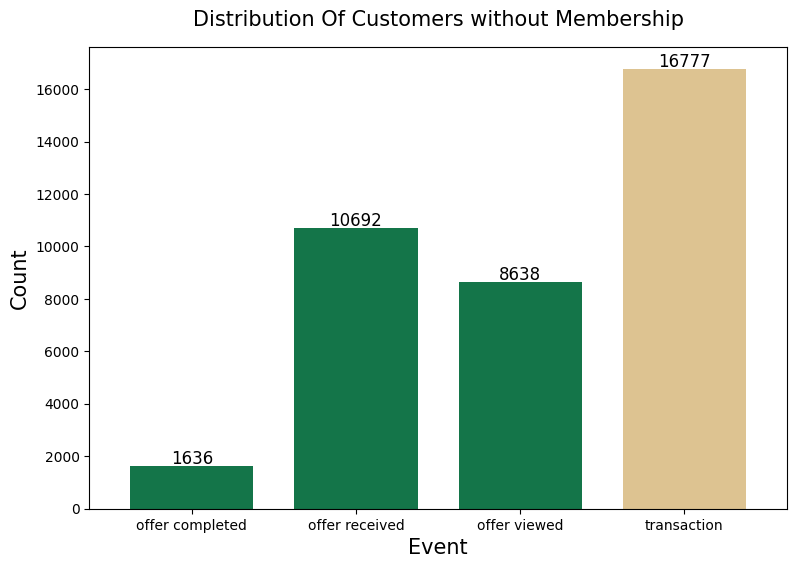

In [109]:
plt.figure(figsize=(9,6))
no_member = without_member.groupby('event')['person'].count()
highest_value = no_member.max()
ax = no_member.sort_index().plot(kind='bar', color='#147549', width=0.75)

for bar in ax.patches:
    if bar.get_height() == highest_value:
        bar.set_facecolor('#DDC391')
        
plt.title('Distribution Of Customers without Membership', loc='center', pad=15, fontsize=15)
plt.xlabel('Event', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

Note : 
- Offer completed : customer membeli dengan menggunakan penawaran
- Offer received : informasi penawaran diterima oleh customer
- Offer viewed : informasi penawaran dilihat oleh customer
- Transaction : customer membeli tanpa menggunakan penawaran

Customer yang tidak menjadi member, lebih banyak membeli tanpa menggunakan penawaran, dan yang membeli menggunakan penawaran sangat dikit

### Membership

In [110]:
member = customer_behaviour[['id', 'became_member_on']]
member = member.drop_duplicates()
member.reset_index(inplace=True)

member = member.assign(year = member.became_member_on.dt.year,
                             month = member.became_member_on.dt.month,
                             day = member.became_member_on.dt.day,
                             month_name = member.became_member_on.dt.month_name(),
                             day_of_week = member.became_member_on.dt.weekday,
                             day_name = member.became_member_on.dt.day_name())
member

,index,id,became_member_on,year,month,day,month_name,day_of_week,day_name
0,0,0009655768c64bdeb2e877511632db8f,2017-04-21,2017,4,21,April,4,Friday
1,4,0020c2b971eb4e9188eac86d93036a77,2016-03-04,2016,3,4,March,4,Friday
2,8,0020ccbbb6d84e358d3414a3ff76cffd,2016-11-11,2016,11,11,November,4,Friday
3,12,003d66b6608740288d6cc97a6903f4f0,2017-06-21,2017,6,21,June,2,Wednesday
4,16,00426fe3ffde4c6b9cb9ad6d077a13ea,2016-08-09,2016,8,9,August,1,Tuesday
...,...,...,...,...,...,...,...,...,...
14584,55052,fff3ba4757bd42088c044ca26d73817a,2015-09-20,2015,9,20,September,6,Sunday
14585,55056,fff7576017104bcc8677a8d63322b5e1,2017-10-31,2017,10,31,October,1,Tuesday
14586,55060,fff8957ea8b240a6b5e634b6ee8eafcf,2018-02-18,2018,2,18,February,6,Sunday
14587,55063,fffad4f4828548d1b5583907f2e9906b,2017-01-23,2017,1,23,January,0,Monday


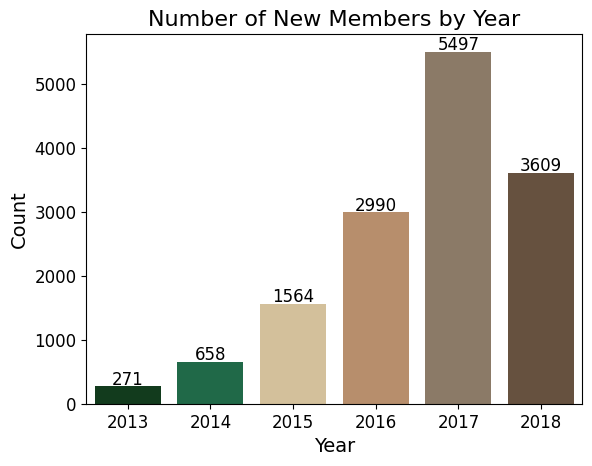

In [111]:
ax = sns.countplot(data = member, x = 'year', palette=starbucks_set)

for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.title('Number of New Members by Year', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Year', fontsize = 14); plt.ylabel('Count', fontsize = 14)
plt.show()

Note :
Dalam 5 tahun (2013-2018) pelanggan mendaftar sebagai member paling banyak di tahun 2017

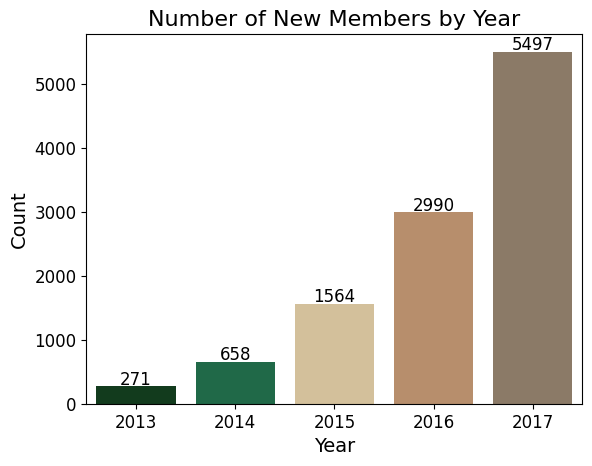

In [112]:
member_filter = member[(member['year']>=2013) & (member['year']<=2017)]
ax = sns.countplot(data = member_filter, x = 'year', palette=starbucks_set)

for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.title('Number of New Members by Year', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Year', fontsize = 14); plt.ylabel('Count', fontsize = 14)
plt.show()

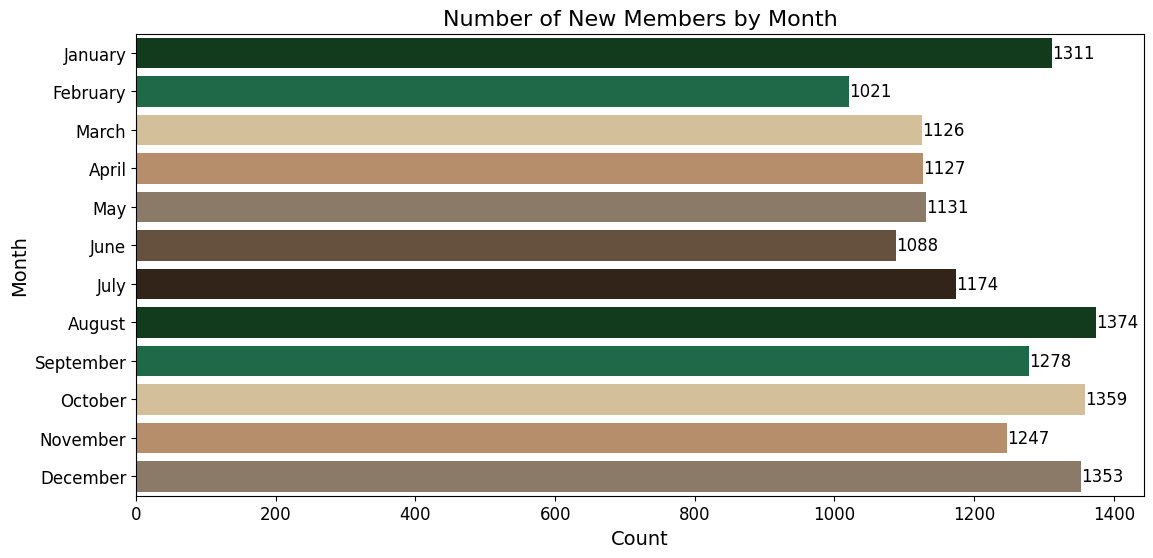

In [113]:
plt.figure(figsize = (13,6))
ax = sns.countplot(data = member.sort_values('month'), y = 'month_name', palette=starbucks_set)
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha="left", va="center", fontsize=12)
plt.title('Number of New Members by Month', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Count', fontsize = 14); plt.ylabel('Month', fontsize = 14)
plt.show()

Note :
Dalam 5 tahun (2013-2018) pelanggan mendaftar sebagai member paling banyak di bulan Agustus

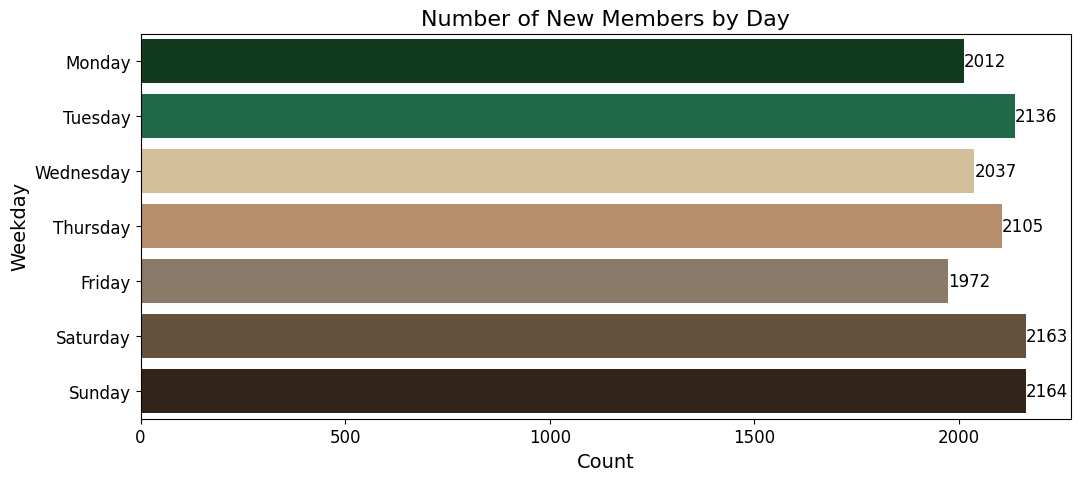

In [114]:
plt.figure(figsize = (12,5))
ax = sns.countplot(data = member.sort_values('day_of_week'), y = 'day_name', palette=starbucks_set)
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha="left", va="center", fontsize=12)
plt.title('Number of New Members by Day', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Count', fontsize = 14); plt.ylabel('Weekday', fontsize = 14)
plt.show()

Note :
Dalam 5 tahun (2013-2018) pelanggan mendaftar sebagai member paling banyak pada weekend tepatnya di hari minggu.

Pada weekend paling banyak di hari selasa

## **MODELLING**

In [115]:
customer_behaviour

,id,gender,age,became_member_on,income,age_group,income_group,event,total_reward,difficulty_avg,...,num_of_social,num_of_web,num_of_bogo,num_of_discount,num_of_informational,num_of_offer_received,num_of_offer_viewed,num_of_offer_completed,num_of_transaction,money_of_spent
0,0009655768c64bdeb2e877511632db8f,Male,33,2017-04-21,72000.0,Usia Produktif,Middle Income,offer completed,9.0,8.333333,...,2,3,1,2,0,0,0,3,0,0.00
1,0009655768c64bdeb2e877511632db8f,Male,33,2017-04-21,72000.0,Usia Produktif,Middle Income,offer received,9.0,5.000000,...,3,4,1,2,2,5,0,0,0,0.00
2,0009655768c64bdeb2e877511632db8f,Male,33,2017-04-21,72000.0,Usia Produktif,Middle Income,offer viewed,7.0,3.750000,...,3,3,1,1,2,0,4,0,0,0.00
3,0009655768c64bdeb2e877511632db8f,Male,33,2017-04-21,72000.0,Usia Produktif,Middle Income,transaction,0.0,0.000000,...,0,0,0,0,0,0,0,0,8,127.60
4,0020c2b971eb4e9188eac86d93036a77,Female,59,2016-03-04,90000.0,Usia Produktif,High Income,offer completed,14.0,10.000000,...,3,3,1,2,0,0,0,3,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55066,fffad4f4828548d1b5583907f2e9906b,Male,34,2017-01-23,34000.0,Usia Produktif,Low Income,transaction,0.0,0.000000,...,0,0,0,0,0,0,0,0,12,88.83
55067,ffff82501cea40309d5fdd7edcca4a07,Female,45,2016-11-25,62000.0,Usia Produktif,Middle Income,offer completed,18.0,10.833333,...,1,6,1,5,0,0,0,6,0,0.00
55068,ffff82501cea40309d5fdd7edcca4a07,Female,45,2016-11-25,62000.0,Usia Produktif,Middle Income,offer received,18.0,10.833333,...,1,6,1,5,0,6,0,0,0,0.00
55069,ffff82501cea40309d5fdd7edcca4a07,Female,45,2016-11-25,62000.0,Usia Produktif,Middle Income,offer viewed,18.0,10.833333,...,1,6,1,5,0,0,6,0,0,0.00


In [116]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [117]:
#pilih kolom yang akan digunakan untuk k-means
X = customer_behaviour.drop(['id', 'event', 'became_member_on','age_group','income_group'], axis=1)
cols = ['gender']
le = LabelEncoder()
for col in cols:
  X[col] = le.fit_transform(X[col])

#normalisasi data pake StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [118]:
#nentuin jumlah cluster (pake metode elbow buat nentuin jumlah cluster yang optimal)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


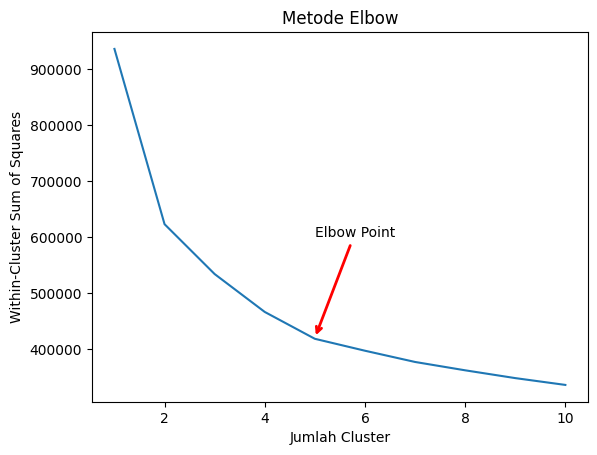

In [119]:
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Within-Cluster Sum of Squares')
plt.annotate('Elbow Point', xy=(5, 420000), xytext=(5, 600000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))
plt.show()

In [120]:
#buat optimal cluster
optimal_num_clusters = 5

In [126]:
#buat model k-means pakai jumlah cluster yang optimal
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=10)
kmeans.fit(X_scaled)

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=10)

In [127]:
#tambah kolom cluster ke tabel data
X['cluster'] = kmeans.labels_

In [128]:
#Korelasi antar atribut
corr = X.corr()
corr.style.background_gradient(cmap='RdBu').format(precision=2)

,gender,age,income,total_reward,difficulty_avg,num_of_email,num_of_mobile,num_of_social,num_of_web,num_of_bogo,num_of_discount,num_of_informational,num_of_offer_received,num_of_offer_viewed,num_of_offer_completed,num_of_transaction,money_of_spent,cluster
gender,1.00,-0.15,-0.23,-0.03,-0.02,-0.02,-0.02,-0.01,-0.02,-0.02,-0.01,0.00,0.01,0.00,-0.05,0.02,-0.06,0.03
age,-0.15,1.00,0.31,0.02,0.02,0.02,0.01,0.00,0.02,0.01,0.02,0.00,-0.01,0.00,0.03,-0.05,0.04,-0.02
income,-0.23,0.31,1.00,0.04,0.04,0.03,0.02,0.01,0.04,0.03,0.03,-0.01,-0.01,-0.00,0.08,-0.09,0.12,-0.04
total_reward,-0.03,0.02,0.04,1.00,0.66,0.84,0.81,0.79,0.74,0.90,0.45,0.15,0.46,0.28,0.22,-0.56,-0.42,0.42
difficulty_avg,-0.02,0.02,0.04,0.66,1.00,0.63,0.53,0.50,0.64,0.44,0.67,-0.03,0.25,0.17,0.37,-0.67,-0.51,0.29
num_of_email,-0.02,0.02,0.03,0.84,0.63,1.00,0.97,0.84,0.92,0.71,0.70,0.50,0.61,0.33,0.16,-0.65,-0.49,0.55
num_of_mobile,-0.02,0.01,0.02,0.81,0.53,0.97,1.00,0.87,0.88,0.74,0.61,0.51,0.57,0.36,0.13,-0.64,-0.48,0.57
num_of_social,-0.01,0.00,0.01,0.79,0.50,0.84,0.87,1.00,0.70,0.68,0.53,0.37,0.42,0.40,0.12,-0.57,-0.43,0.53
num_of_web,-0.02,0.02,0.04,0.74,0.64,0.92,0.88,0.70,1.00,0.62,0.77,0.33,0.56,0.26,0.21,-0.61,-0.46,0.46
num_of_bogo,-0.02,0.01,0.03,0.90,0.44,0.71,0.74,0.68,0.62,1.00,0.14,0.13,0.37,0.26,0.18,-0.48,-0.36,0.38


In [129]:
X

,gender,age,income,total_reward,difficulty_avg,num_of_email,num_of_mobile,num_of_social,num_of_web,num_of_bogo,num_of_discount,num_of_informational,num_of_offer_received,num_of_offer_viewed,num_of_offer_completed,num_of_transaction,money_of_spent,cluster
0,1,33,72000.0,9.0,8.333333,3,3,2,3,1,2,0,0,0,3,0,0.00,0
1,1,33,72000.0,9.0,5.000000,5,5,3,4,1,2,2,5,0,0,0,0.00,3
2,1,33,72000.0,7.0,3.750000,4,4,3,3,1,1,2,0,4,0,0,0.00,4
3,1,33,72000.0,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,8,127.60,1
4,0,59,90000.0,14.0,10.000000,3,3,3,3,1,2,0,0,0,3,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55066,1,34,34000.0,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,12,88.83,1
55067,0,45,62000.0,18.0,10.833333,6,5,1,6,1,5,0,0,0,6,0,0.00,0
55068,0,45,62000.0,18.0,10.833333,6,5,1,6,1,5,0,6,0,0,0,0.00,3
55069,0,45,62000.0,18.0,10.833333,6,5,1,6,1,5,0,0,6,0,0,0.00,4


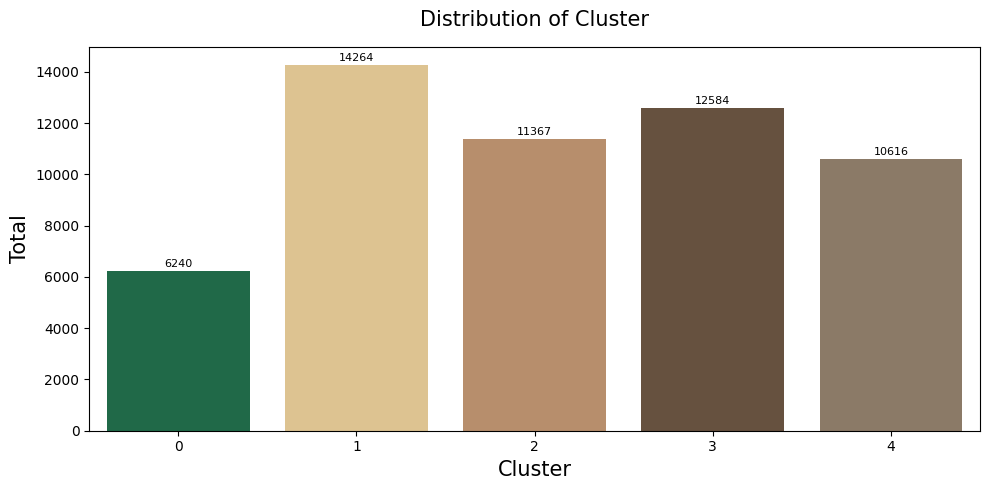

In [130]:
# Melakukan groupby dan menghitung jumlah
cluster_dist = X['cluster'].value_counts()

plt.figure(figsize=(10, 5))

# Gunakan seaborn's barplot untuk membuat multiple bar chart
ax = sns.barplot(x=cluster_dist.index, y=cluster_dist.values, palette=starbucks_color)

# Menambahkan label pada setiap bar
for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan judul dan label
plt.title('Distribution of Cluster', fontsize=15, pad=15)
plt.ylabel('Total', fontsize=15)
plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()
plt.show()


In [134]:
X['kategori_cluster'] = X['cluster'].apply(lambda x:'Most Valuable Customer' if x==0 else
                                                            ('Loyal Customer' if x==1 else
                                                             ('High Potential Customer' if x==2 else
                                                              ('Passive Customer' if x==3 else
                                                            ('Observers Promo Customer')))))

X

,gender,age,income,total_reward,difficulty_avg,num_of_email,num_of_mobile,num_of_social,num_of_web,num_of_bogo,num_of_discount,num_of_informational,num_of_offer_received,num_of_offer_viewed,num_of_offer_completed,num_of_transaction,money_of_spent,cluster,kategori_cluster
0,1,33,72000.0,9.0,8.333333,3,3,2,3,1,2,0,0,0,3,0,0.00,0,Most Valuable Customer
1,1,33,72000.0,9.0,5.000000,5,5,3,4,1,2,2,5,0,0,0,0.00,3,Passive Customer
2,1,33,72000.0,7.0,3.750000,4,4,3,3,1,1,2,0,4,0,0,0.00,4,Observers Promo Customer
3,1,33,72000.0,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,8,127.60,1,Loyal Customer
4,0,59,90000.0,14.0,10.000000,3,3,3,3,1,2,0,0,0,3,0,0.00,0,Most Valuable Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55066,1,34,34000.0,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,12,88.83,1,Loyal Customer
55067,0,45,62000.0,18.0,10.833333,6,5,1,6,1,5,0,0,0,6,0,0.00,0,Most Valuable Customer
55068,0,45,62000.0,18.0,10.833333,6,5,1,6,1,5,0,6,0,0,0,0.00,3,Passive Customer
55069,0,45,62000.0,18.0,10.833333,6,5,1,6,1,5,0,0,6,0,0,0.00,4,Observers Promo Customer


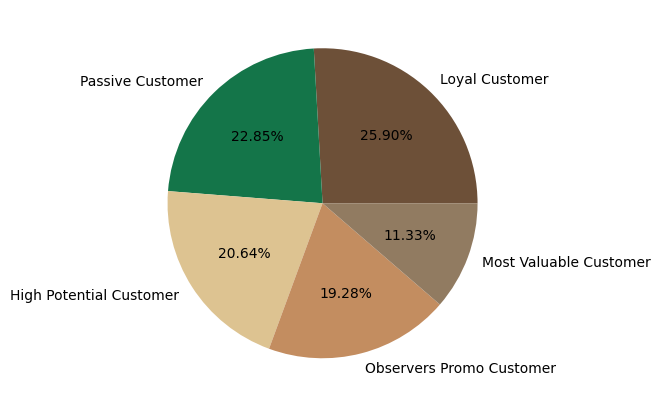

In [135]:
# pie_kategori = {'High Potential Customer':'#147549','Loyal Customer':'#eac784','Most Valuable Customer':'#c38d60','Passive Customer':'#6d5038','Observers Customer':'#917b61'}
pie_kategori = {'High Potential Customer':'#DDC391','Loyal Customer':'#6d5038','Most Valuable Customer':'#917b61','Passive Customer':'#147549','Observers Promo Customer':'#c38d60'}
# '#c38d60', '#917b61', '#6d5038'
kategori_cluster = X['kategori_cluster'].value_counts()
plt.figure(figsize=(5,6))
plt.pie(kategori_cluster, labels=kategori_cluster.index, autopct='%1.2f%%', colors=[pie_kategori[kc] for kc in kategori_cluster.index])
plt.show()

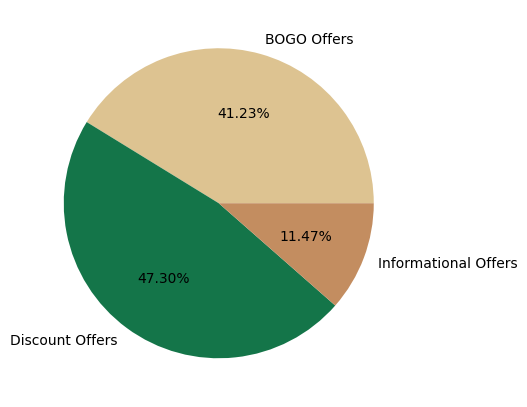

In [144]:
pie_hp = {'num_of_bogo': '#DDC391', 'num_of_discount': '#147549', 'num_of_informational': '#c38d60'}
hp_offer_type = X[X['kategori_cluster']=='High Potential Customer'][['num_of_bogo', 'num_of_discount', 'num_of_informational']].sum()
labels = ['BOGO Offers', 'Discount Offers', 'Informational Offers']
plt.figure(figsize=(5,6))
plt.pie(hp_offer_type, labels=labels, autopct='%1.2f%%', colors=[pie_hp[hp] for hp in hp_offer_type.index])
plt.show()

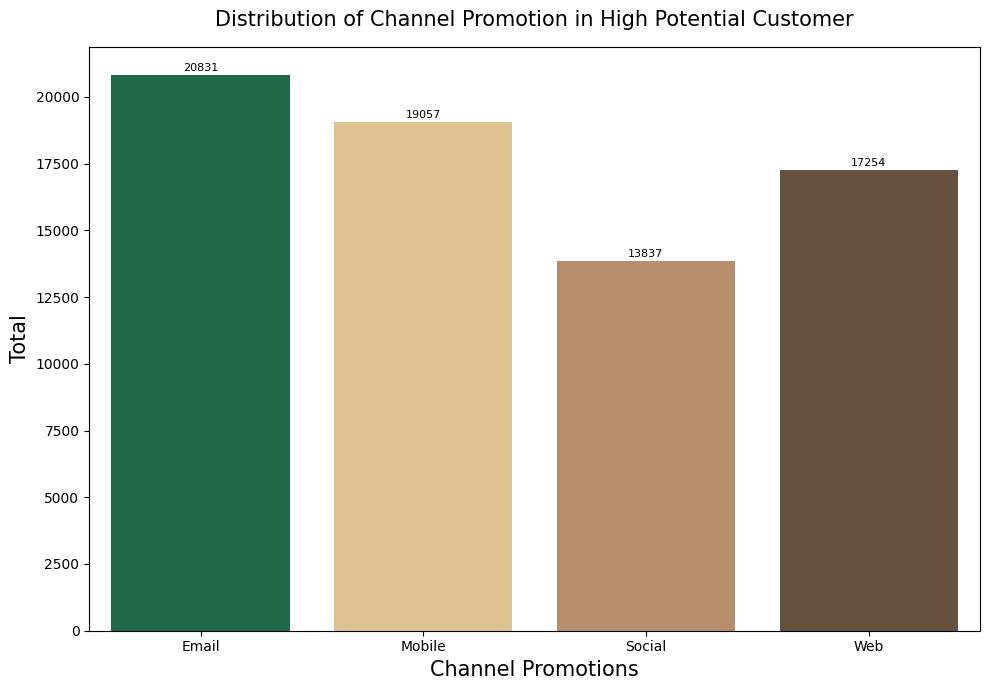

In [146]:
# Melakukan groupby dan menghitung jumlah
high_potential = X[X['kategori_cluster']=='High Potential Customer'][['num_of_email', 'num_of_mobile', 'num_of_social', 'num_of_web']].sum()

plt.figure(figsize=(10, 7))

# Gunakan seaborn's barplot untuk membuat multiple bar chart
ax = sns.barplot(x=high_potential.index, y=high_potential.values, palette=starbucks_color)

# Menambahkan label pada setiap bar
for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan judul dan label
plt.title('Distribution of Channel Promotion in High Potential Customer', fontsize=15, pad=15)
plt.ylabel('Total', fontsize=15)
plt.xlabel('Channel Promotions', fontsize=15)
ax.set_xticklabels(['Email', 'Mobile', 'Social', 'Web'], rotation=0)
plt.tight_layout()
plt.show()


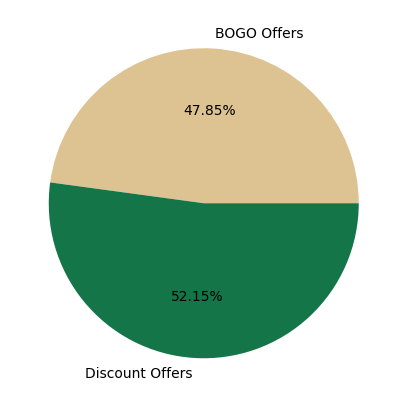

In [153]:
pie_mvc = {'num_of_bogo': '#DDC391', 'num_of_discount': '#147549'}
mvc_offer_type = X[X['kategori_cluster']=='Most Valuable Customer'][['num_of_bogo', 'num_of_discount']].sum()
labels = ['BOGO Offers', 'Discount Offers']
plt.figure(figsize=(5,6))
plt.pie(mvc_offer_type, labels=labels, autopct='%1.2f%%', colors=[pie_hp[hp] for hp in mvc_offer_type.index])
plt.show()

In [149]:
X[X['kategori_cluster']=='Loyal Customer'][['num_of_bogo', 'num_of_discount', 'num_of_informational']].sum()

num_of_bogo             0
num_of_discount         0
num_of_informational    0
dtype: int64

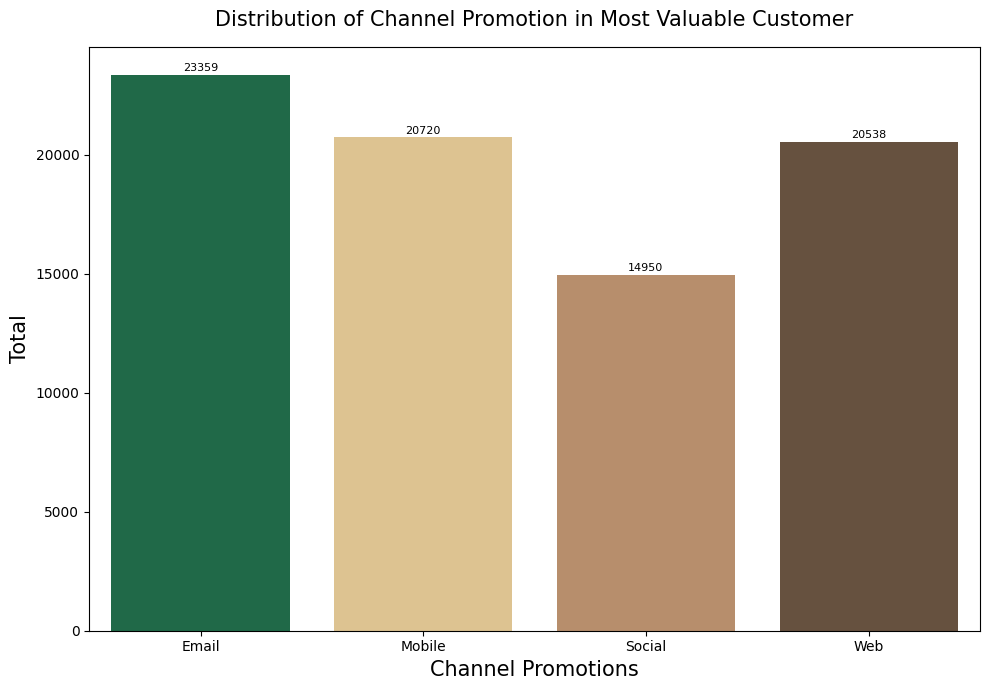

In [154]:
# Melakukan groupby dan menghitung jumlah
mvc_cust = X[X['kategori_cluster']=='Most Valuable Customer'][['num_of_email', 'num_of_mobile', 'num_of_social', 'num_of_web']].sum()

plt.figure(figsize=(10, 7))

# Gunakan seaborn's barplot untuk membuat multiple bar chart
ax = sns.barplot(x=mvc_cust.index, y=mvc_cust.values, palette=starbucks_color)

# Menambahkan label pada setiap bar
for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan judul dan label
plt.title('Distribution of Channel Promotion in Most Valuable Customer', fontsize=15, pad=15)
plt.ylabel('Total', fontsize=15)
plt.xlabel('Channel Promotions', fontsize=15)
ax.set_xticklabels(['Email', 'Mobile', 'Social', 'Web'], rotation=0)
plt.tight_layout()
plt.show()


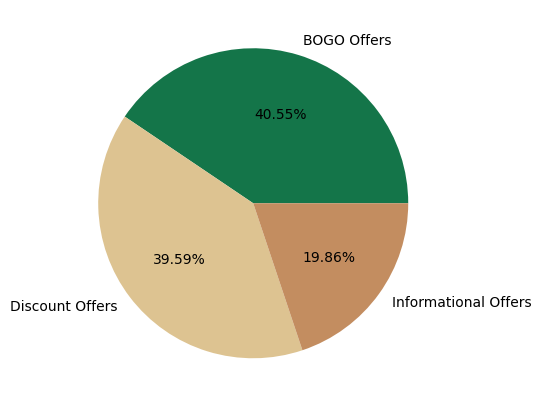

In [156]:
pc_hp = {'num_of_bogo': '#147549', 'num_of_discount': '#DDC391', 'num_of_informational': '#c38d60'}
pc_offer_type = X[X['kategori_cluster']=='Passive Customer'][['num_of_bogo', 'num_of_discount', 'num_of_informational']].sum()
labels = ['BOGO Offers', 'Discount Offers', 'Informational Offers']
plt.figure(figsize=(5,6))
plt.pie(pc_offer_type, labels=labels, autopct='%1.2f%%', colors=[pc_hp[pc] for pc in pc_offer_type.index])
plt.show()

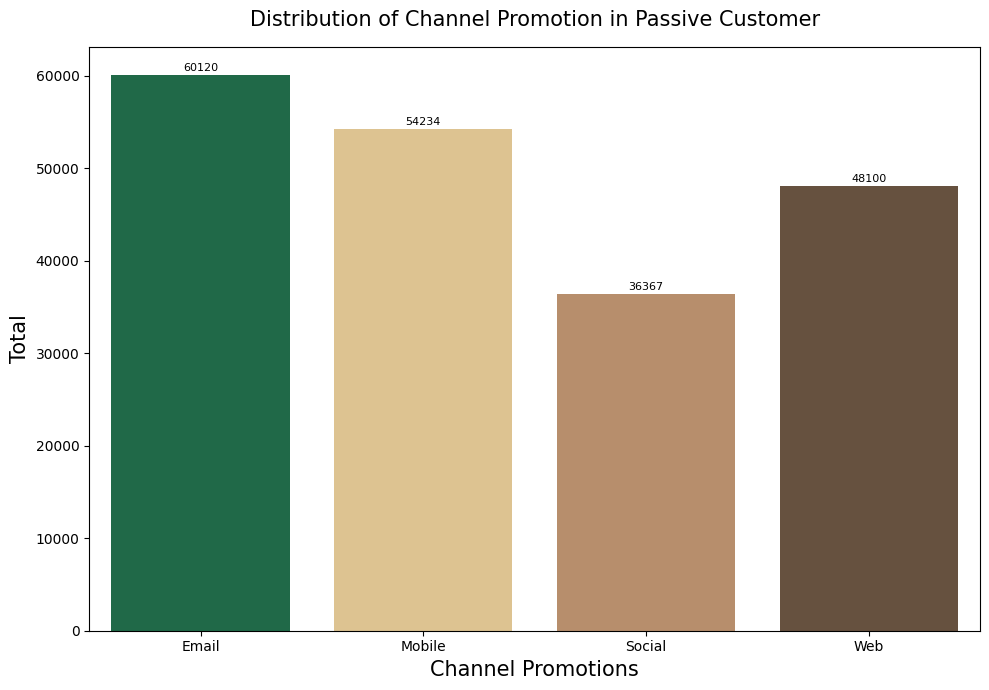

In [155]:
# Melakukan groupby dan menghitung jumlah
passive_cust = X[X['kategori_cluster']=='Passive Customer'][['num_of_email', 'num_of_mobile', 'num_of_social', 'num_of_web']].sum()

plt.figure(figsize=(10, 7))

# Gunakan seaborn's barplot untuk membuat multiple bar chart
ax = sns.barplot(x=passive_cust.index, y=passive_cust.values, palette=starbucks_color)

# Menambahkan label pada setiap bar
for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan judul dan label
plt.title('Distribution of Channel Promotion in Passive Customer', fontsize=15, pad=15)
plt.ylabel('Total', fontsize=15)
plt.xlabel('Channel Promotions', fontsize=15)
ax.set_xticklabels(['Email', 'Mobile', 'Social', 'Web'], rotation=0)
plt.tight_layout()
plt.show()


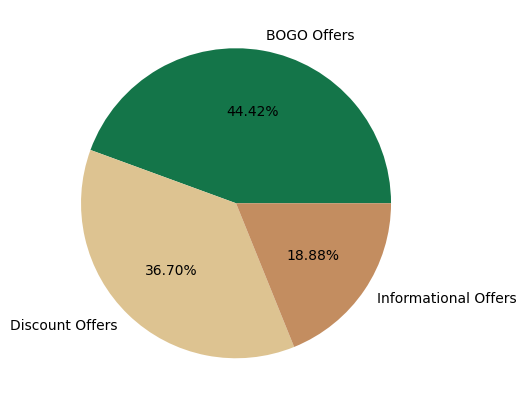

In [158]:
opc_hp = {'num_of_bogo': '#147549', 'num_of_discount': '#DDC391', 'num_of_informational': '#c38d60'}
opc_offer_type = X[X['kategori_cluster']=='Observers Promo Customer'][['num_of_bogo', 'num_of_discount', 'num_of_informational']].sum()
labels = ['BOGO Offers', 'Discount Offers', 'Informational Offers']
plt.figure(figsize=(5,6))
plt.pie(opc_offer_type, labels=labels, autopct='%1.2f%%', colors=[opc_hp[opc] for opc in opc_offer_type.index])
plt.show()

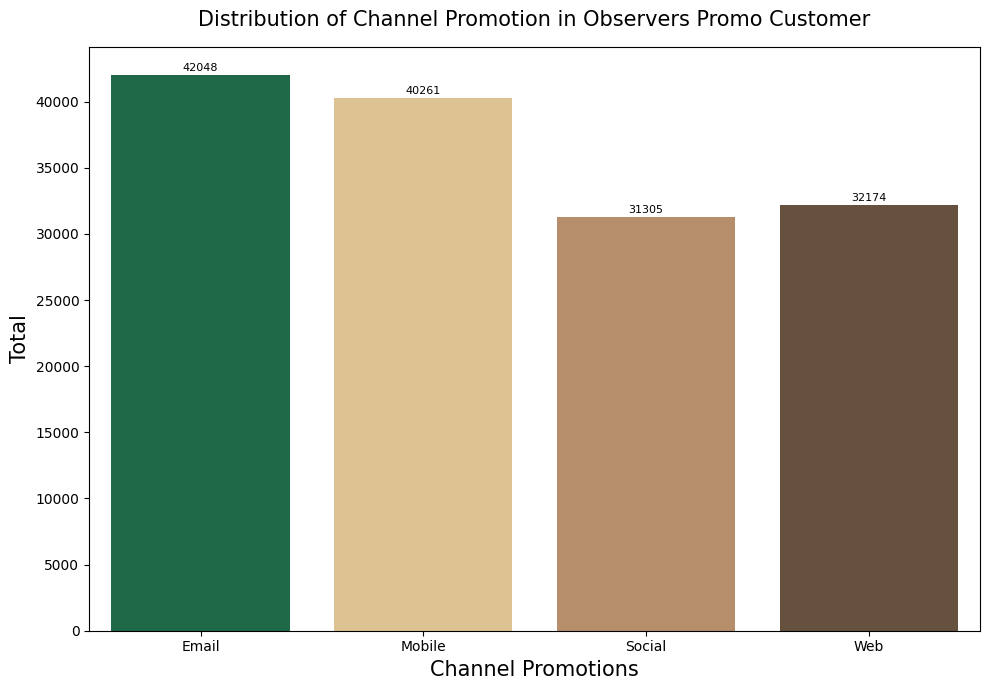

In [157]:
# Melakukan groupby dan menghitung jumlah
observer_cust = X[X['kategori_cluster']=='Observers Promo Customer'][['num_of_email', 'num_of_mobile', 'num_of_social', 'num_of_web']].sum()

plt.figure(figsize=(10, 7))

# Gunakan seaborn's barplot untuk membuat multiple bar chart
ax = sns.barplot(x=observer_cust.index, y=observer_cust.values, palette=starbucks_color)

# Menambahkan label pada setiap bar
for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan judul dan label
plt.title('Distribution of Channel Promotion in Observers Promo Customer', fontsize=15, pad=15)
plt.ylabel('Total', fontsize=15)
plt.xlabel('Channel Promotions', fontsize=15)
ax.set_xticklabels(['Email', 'Mobile', 'Social', 'Web'], rotation=0)
plt.tight_layout()
plt.show()
